In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from functools import reduce
import scipy.stats as spst

In [2]:
#데이터 불러오기
full_path  = os.getcwd()
data_path  = os.path.join(full_path, 'data')

product_info = pd.read_csv(os.path.join(data_path, 'NH_CONTEST_NW_FC_STK_IEM_IFO.csv'), encoding='cp949')
product_price = pd.read_csv(os.path.join(data_path, 'NH_CONTEST_STK_DT_QUT.csv'), encoding='cp949')
stk_dd_info = pd.read_csv(os.path.join(data_path, 'NH_CONTEST_NHDATA_STK_DD_IFO.csv'), encoding='cp949')
ifw_ofw_ifo = pd.read_csv(os.path.join(data_path, 'NH_CONTEST_NHDATA_IFW_OFW_IFO.csv'), encoding='cp949')
cus_tp_ifo = pd.read_csv(os.path.join(data_path, 'NH_CONTEST_NHDATA_CUS_TP_IFO.csv'), encoding='cp949')
etf_holdings = pd.read_csv(os.path.join(data_path, 'NH_CONTEST_DATA_ETF_HOLDINGS.csv'), encoding='cp949')
historical_dividend = pd.read_csv(os.path.join(data_path, 'NH_CONTEST_DATA_HISTORICAL_DIVIDEND.csv'), encoding='cp949')
etf_sor_ifo = pd.read_csv(os.path.join(data_path, 'NH_CONTEST_ETF_SOR_IFO.csv'), encoding='cp949')

In [3]:
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000

## 1. 데이터 분석

###   NH_CONTEST_NW_FC_STK_IEM_IFO
NH_CONTEST_NW_FC_STK_IEM_IFO.csv에 있는 종목 일자별 시세 정보

In [4]:
product_price

bse_dt    tck_iem_cd  iem_ong_pr  iem_hi_pr  iem_low_pr  iem_end_pr  \
0       20240722  AAL                10.49    10.7400     10.3500       10.69   
1       20240603  AAL                11.60    11.9450     11.5000       11.53   
2       20240531  AAL                11.51    11.5700     11.2500       11.50   
3       20240625  AAL                11.18    11.3650     11.1200       11.13   
4       20240605  AAL                11.51    11.7650     11.4500       11.62   
...          ...           ...         ...        ...         ...         ...   
194826  20240702  ZS                197.60   199.3747    194.7084      196.66   
194827  20240807  ZS                171.14   174.7700    166.0600      166.20   
194828  20240617  ZS                183.00   185.5800    180.7600      184.38   
194829  20240815  ZS                186.81   191.6200    184.9800      190.34   
194830  20240715  ZS                202.65   208.1400    200.0200      204.47   

        bf_dd_cmp_ind_pr  bf_dd_cmp_ind_rt  acl_trd_qty      trd_cst  \
0                   0.11              1.04   38895463.0  414252965.0   
1                   0.03              0.26   52899042.0  609925954.0   
2                   0.06              0.52   60868405.0  699986658.0   
3                  -0.03             -0.27   28547274.0  317731160.0   
4                   0.12              1.04   34340914.0  399041421.0   
...                  ...               ...          ...          ...   
194826             -1.96             -0.99    1725207.0  339904669.0   
194827              0.45              0.27    1362130.0  231882881.0   
194828              0.16              0.09    1790442.0  328666782.0   
194829              6.36              3.46    1583690.0  300663546.0   
194830              2.57              1.27    2555283.0  525283138.0   

        sll_cns_sum_qty  byn_cns_sum_qty  sby_bse_xcg_rt  
0                   0.0              0.0          1386.6  
1            27221369.0       25722473.0          1381.6  
2            28279620.0       32588785.0          1376.5  
3            17399022.0       11148252.0          1389.7  
4            17637074.0       16703939.0          1373.1  
...                 ...              ...             ...  
194826              0.0              0.0          1380.8  
194827         879205.0         878868.0          1372.2  
194828         720798.0        1069644.0          1377.7  
194829        1127670.0         990550.0          1370.3  
194830        1591023.0        1581600.0          1376.3  

[194831 rows x 13 columns]

In [5]:
#datetime type으로 변경
product_price['bse_dt'] = pd.to_datetime(product_price['bse_dt'].astype(str), format='%Y%m%d')

In [6]:
# 종목, 일시 순으로 정렬
product_price_sort = product_price.sort_values(['tck_iem_cd','bse_dt'])
product_price_sort.head()

bse_dt    tck_iem_cd  iem_ong_pr  iem_hi_pr  iem_low_pr  \
100877 2024-05-28  AA                 42.80      43.60     42.4358   
100890 2024-05-29  AA                 42.47      44.01     42.2700   
100846 2024-05-30  AA                 43.29      45.48     43.1800   
100886 2024-05-31  AA                 44.76      45.46     43.3000   
100873 2024-06-03  AA                 44.66      44.96     43.7501   

        iem_end_pr  bf_dd_cmp_ind_pr  bf_dd_cmp_ind_rt  acl_trd_qty  \
100877       43.20              1.56              3.75    7888482.0   
100890       43.93              0.73              1.69    5275412.0   
100846       44.54              0.61              1.39    5824970.0   
100886       44.27             -0.27             -0.61    4527342.0   
100873       44.01             -0.26             -0.59    3887113.0   

            trd_cst  sll_cns_sum_qty  byn_cns_sum_qty  sby_bse_xcg_rt  
100877  340782422.0        5270371.0        2618111.0          1365.4  
100890  231748849.0        1815583.0        3459829.0          1359.5  
100846  259444164.0        2522819.0        3302151.0          1364.8  
100886  200425430.0        1921982.0        2605360.0          1376.5  
100873  171071843.0        1308434.0        2578679.0          1381.6

In [7]:
#종목 코드 value 전처리
product_price_sort['tck_iem_cd'] = product_price_sort['tck_iem_cd'].str.strip()

In [8]:
product_price_sort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194831 entries, 100877 to 100836
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   bse_dt            194831 non-null  datetime64[ns]
 1   tck_iem_cd        194831 non-null  object        
 2   iem_ong_pr        194831 non-null  float64       
 3   iem_hi_pr         194831 non-null  float64       
 4   iem_low_pr        194831 non-null  float64       
 5   iem_end_pr        194831 non-null  float64       
 6   bf_dd_cmp_ind_pr  194831 non-null  float64       
 7   bf_dd_cmp_ind_rt  194831 non-null  float64       
 8   acl_trd_qty       194831 non-null  float64       
 9   trd_cst           194831 non-null  float64       
 10  sll_cns_sum_qty   194831 non-null  float64       
 11  byn_cns_sum_qty   194831 non-null  float64       
 12  sby_bse_xcg_rt    194831 non-null  float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 

In [9]:
# 종목 수 : 3094개
product_price_sort['tck_iem_cd'].nunique()

3094

In [10]:
#종목 명 리스트화
tck_cd = list(product_price_sort['tck_iem_cd'].unique())
tck_cd[:5]

['AA', 'AAL', 'AAN', 'AAOI', 'AAON']

C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

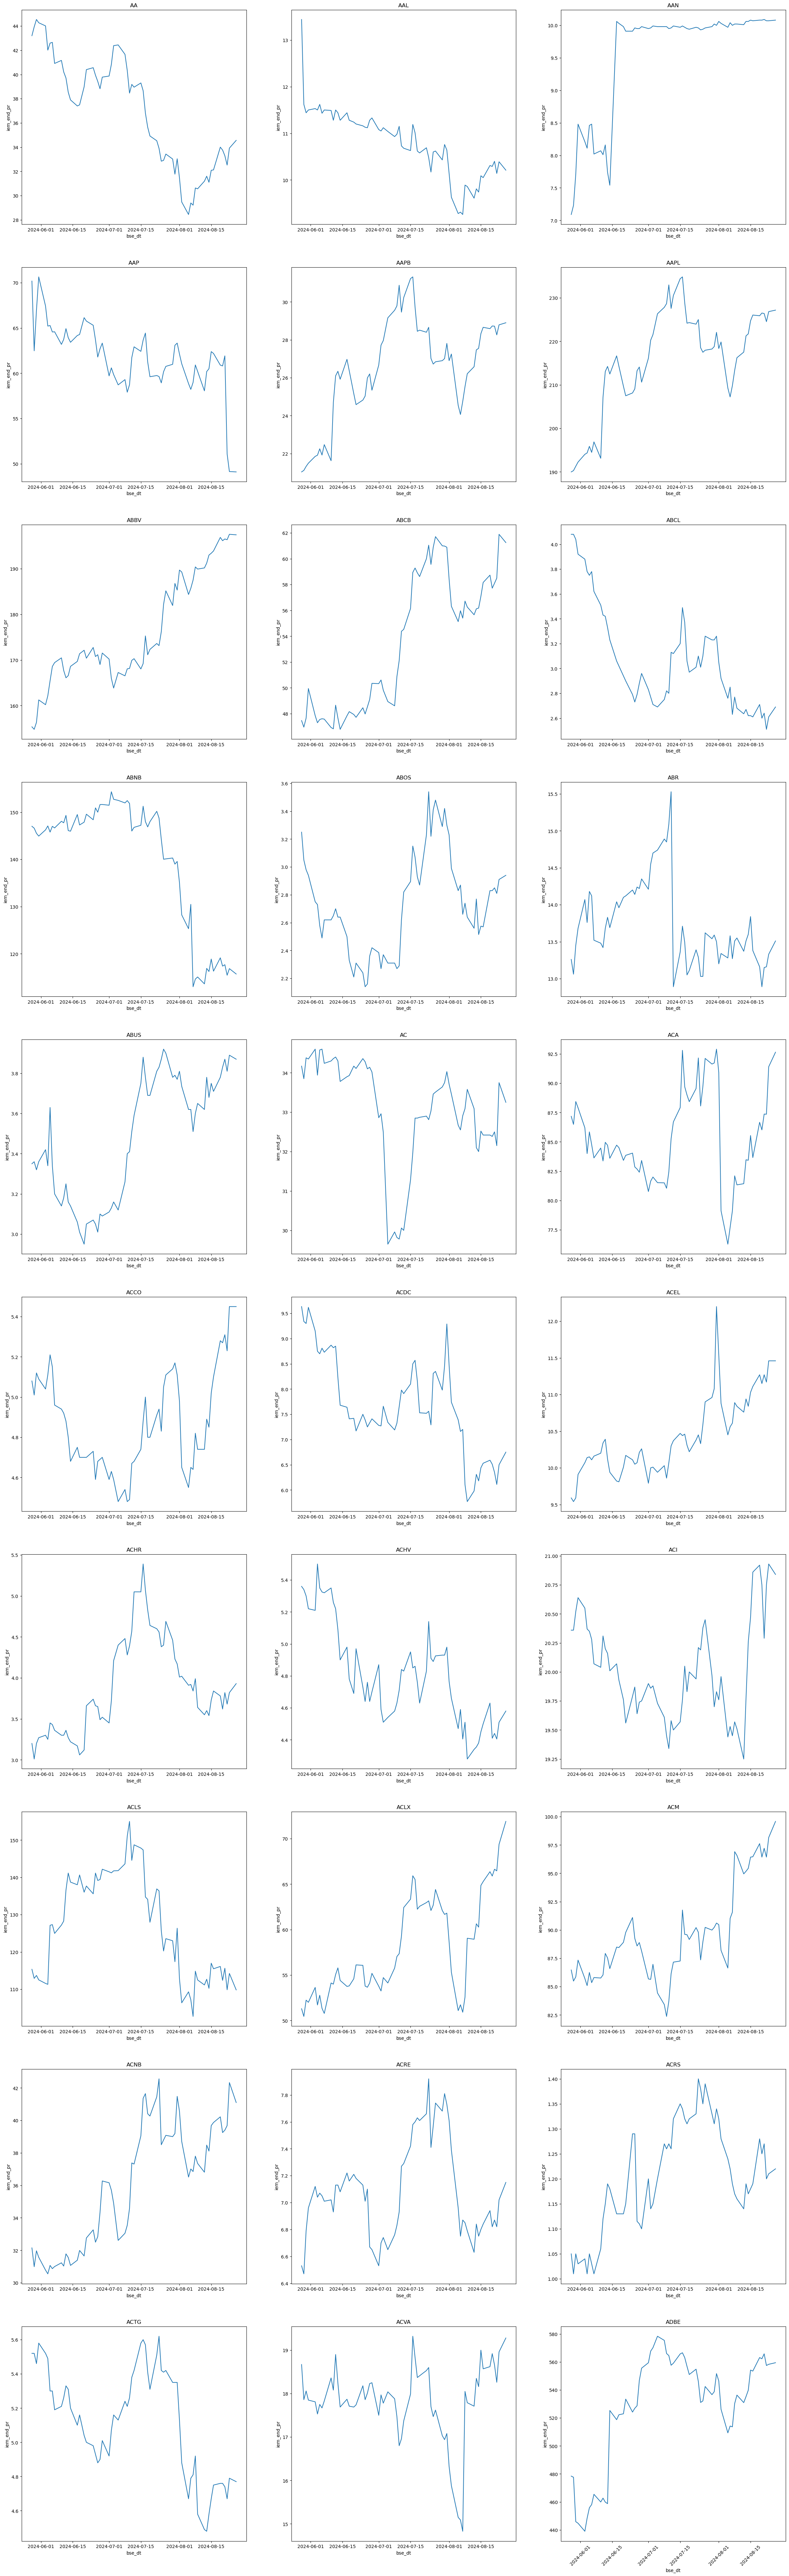

In [11]:
#종가 시계열 그래프(일부)
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(30, 100))

for row in range(10):
    for col in range(3):
        idx = row * 5 + col
        ax = axes[row][col]
        ax.set_title(tck_cd[idx])
        sns.lineplot(data=product_price_sort[product_price_sort['tck_iem_cd']==tck_cd[idx]], x="bse_dt", y="iem_end_pr", ax=ax)
        plt.xticks(rotation=45)

### NH_CONTEST_NHDATA_STK_DD_IFO
NH데이터 기반 주식 일별 정보

In [12]:
stk_dd_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81638 entries, 0 to 81637
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bse_dt                 81638 non-null  int64  
 1   tck_iem_cd             81638 non-null  object 
 2   tot_hld_act_cnt        81638 non-null  int64  
 3   tot_hld_qty            81638 non-null  int64  
 4   tco_avg_hld_qty        81638 non-null  float64
 5   tco_avg_hld_wht_rt     81638 non-null  float64
 6   tco_avg_eal_pls        81638 non-null  float64
 7   tco_avg_phs_uit_pr     81638 non-null  float64
 8   tco_avg_pft_rt         81638 non-null  float64
 9   tco_avg_hld_te_dd_cnt  81638 non-null  float64
 10  dist_hnk_pct10_nmv     81638 non-null  float64
 11  dist_hnk_pct30_nmv     81638 non-null  float64
 12  dist_hnk_pct50_nmv     81638 non-null  float64
 13  dist_hnk_pct70_nmv     81638 non-null  float64
 14  dist_hnk_pct90_nmv     81638 non-null  float64
 15  bs

In [13]:
stk_dd_info.head()

bse_dt    tck_iem_cd  tot_hld_act_cnt  tot_hld_qty  tco_avg_hld_qty  \
0  20240730  AAL                      2705       313122           115.76   
1  20240711  AAL                      2717       304962           112.24   
2  20240710  AAL                      2721       303099           111.39   
3  20240610  AAL                      2761       277875           100.64   
4  20240529  AAL                      2615       227029            86.82   

   tco_avg_hld_wht_rt  tco_avg_eal_pls  tco_avg_phs_uit_pr  tco_avg_pft_rt  \
0               14.86       -491381.62            20809.67          -22.75   
1               14.38       -389528.74            20895.44          -18.34   
2               14.53       -421285.00            20907.40          -19.93   
3               14.72       -377206.65            21030.96          -19.25   
4               15.32       -182141.06            21412.94          -10.30   

   tco_avg_hld_te_dd_cnt  dist_hnk_pct10_nmv  dist_hnk_pct30_nmv  \
0                    1.0         15594.42000            18497.00   
1                    1.0         15746.15385            18673.25   
2                    1.0         15758.86806            18687.50   
3                    3.0         15982.88000            18909.00   
4                    1.0         17097.00000            19434.50   

   dist_hnk_pct50_nmv  dist_hnk_pct70_nmv  dist_hnk_pct90_nmv  bse_end_pr  \
0             20812.0           23336.400           25598.071   14414.531   
1             20853.0           23338.000           25598.533   15449.399   
2             20873.0           23336.400           25598.533   15189.803   
3             20978.0           23349.318           25608.000   15719.313   
4             21418.0           23506.000           25680.509   18271.678   

   lss_ivo_rt  pft_ivo_rt  ifw_act_cnt  ofw_act_cnt  vw_tgt_cnt  rgs_tgt_cnt  
0      0.9811      0.0189            5            4         655            6  
1      0.9382      0.0611            5           11        1353           12  
2      0.9662      0.0338            6           12         619           14  
3      0.9377      0.0623           27            6         406            0  
4      0.8172      0.1816            6           21        2100           15

- tco_avg_hld_qty의 경우 tot_hld_qty / tot_hld_act_cnt 으로 계산됨
- DIST_HNK_PCT 관련 열은 투자자들 중 매입단가 기준으로 매입단가가 낮을 수록 상위분포

In [14]:
# 총 1277개 종목
stk_dd_info['tck_iem_cd'].nunique()

1277

티커종목코드, 날짜 순으로 정렬

In [15]:
stk_dd_info['bse_dt'] = pd.to_datetime(stk_dd_info['bse_dt'].astype(str), format='%Y%m%d')

In [16]:
stk_dd_info_sort = stk_dd_info.sort_values(['tck_iem_cd','bse_dt'])
stk_dd_info_sort.head()

bse_dt    tck_iem_cd  tot_hld_act_cnt  tot_hld_qty  tco_avg_hld_qty  \
44010 2024-05-28  AA                        274         8688            31.71   
44008 2024-05-29  AA                        274         8890            32.45   
43982 2024-05-30  AA                        270         8792            32.56   
43994 2024-05-31  AA                        272         8892            32.69   
44015 2024-06-03  AA                        273         9214            33.75   

       tco_avg_hld_wht_rt  tco_avg_eal_pls  tco_avg_phs_uit_pr  \
44010               13.45        223297.32            49991.79   
44008               13.68        281692.01            50029.81   
43982               14.05        322153.38            50114.77   
43994               13.65        359663.80            50365.17   
44015               13.53        349597.01            50680.10   

       tco_avg_pft_rt  tco_avg_hld_te_dd_cnt  dist_hnk_pct10_nmv  \
44010           14.14                    1.0             31511.0   
44008           17.35                    1.0             31511.0   
43982           19.76                    1.0             31511.0   
43994           21.87                    1.0             31511.0   
44015           20.39                    3.0             31511.0   

       dist_hnk_pct30_nmv  dist_hnk_pct50_nmv  dist_hnk_pct70_nmv  \
44010             39755.0           50708.250           55254.500   
44008             39755.0           50720.952           55286.097   
43982             39755.0           50965.929           55637.723   
43994             40768.0           51203.455           55955.300   
44015             41103.0           51674.000           56349.490   

       dist_hnk_pct90_nmv  bse_end_pr  lss_ivo_rt  pft_ivo_rt  ifw_act_cnt  \
44010           66167.744   56855.256      0.2299      0.7701            2   
44008           66167.744   58730.400      0.1569      0.8431            4   
43982           67014.000   59955.664      0.1444      0.8556            3   
43994           66167.744   61309.310      0.1287      0.8713            9   
44015           66167.744   61163.432      0.1538      0.8462            7   

       ofw_act_cnt  vw_tgt_cnt  rgs_tgt_cnt  
44010            4         330            6  
44008            4         454            6  
43982            7         478           25  
43994            7         513           11  
44015            6         272            8

In [17]:
# 공백 제거
stk_dd_info_sort['tck_iem_cd'] = stk_dd_info_sort['tck_iem_cd'].str.strip()

In [18]:
stk_tck_cd = list(stk_dd_info_sort['tck_iem_cd'].unique())

C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jonnior_P\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

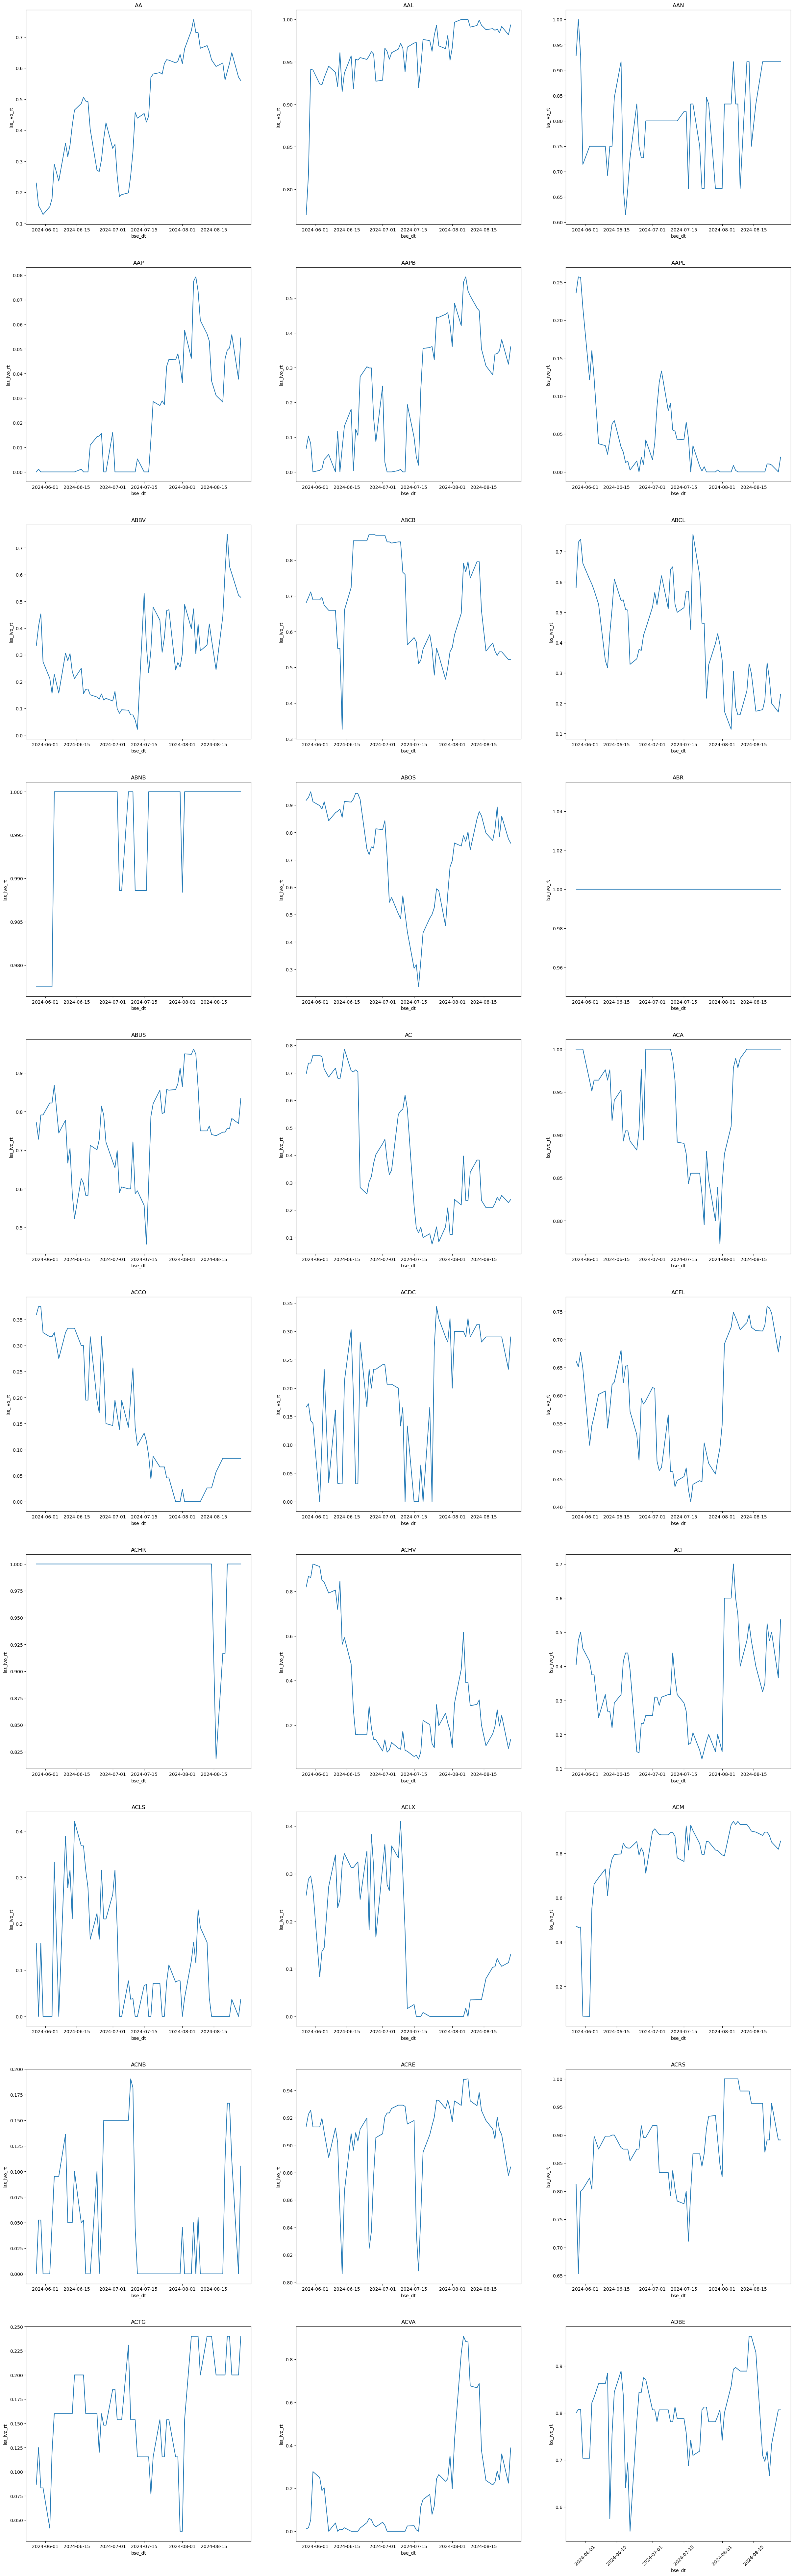

In [19]:
#lss_ivo_rt 시계열 그래프
#종가와 유사한 경향성을 가지고 있는지 대략적으로 확인하기 위함
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(30, 100))

for row in range(10):
    for col in range(3):
        idx = row * 5 + col
        ax = axes[row][col]
        ax.set_title(tck_cd[idx])
        sns.lineplot(data=stk_dd_info_sort[stk_dd_info_sort['tck_iem_cd']==stk_tck_cd[idx]], x="bse_dt", y="lss_ivo_rt", ax=ax)
        plt.xticks(rotation=45)

In [20]:
# 상관관계 확인
stk_dd_info_sort.corr(numeric_only = True)

tot_hld_act_cnt  tot_hld_qty  tco_avg_hld_qty  \
tot_hld_act_cnt               1.000000     0.570129        -0.019897   
tot_hld_qty                   0.570129     1.000000         0.110375   
tco_avg_hld_qty              -0.019897     0.110375         1.000000   
tco_avg_hld_wht_rt            0.231647     0.223389         0.203830   
tco_avg_eal_pls               0.067862    -0.013962         0.034262   
tco_avg_phs_uit_pr            0.045057    -0.039911        -0.131866   
tco_avg_pft_rt                0.058609    -0.034805        -0.040216   
tco_avg_hld_te_dd_cnt         0.000068     0.000555        -0.000851   
dist_hnk_pct10_nmv            0.047965    -0.046932        -0.141279   
dist_hnk_pct30_nmv            0.042470    -0.042734        -0.132108   
dist_hnk_pct50_nmv            0.041428    -0.038651        -0.127115   
dist_hnk_pct70_nmv            0.048664    -0.036255        -0.128503   
dist_hnk_pct90_nmv            0.052642    -0.034508        -0.130220   
bse_end_pr                    0.054042    -0.037258        -0.121254   
lss_ivo_rt                   -0.051411     0.057037         0.123970   
pft_ivo_rt                    0.051357    -0.057365        -0.124701   
ifw_act_cnt                   0.517859     0.393347        -0.004424   
ofw_act_cnt                   0.692117     0.470032        -0.005888   
vw_tgt_cnt                    0.724582     0.471782        -0.003344   
rgs_tgt_cnt                   0.730114     0.432120        -0.020713   

                       tco_avg_hld_wht_rt  tco_avg_eal_pls  \
tot_hld_act_cnt                  0.231647         0.067862   
tot_hld_qty                      0.223389        -0.013962   
tco_avg_hld_qty                  0.203830         0.034262   
tco_avg_hld_wht_rt               1.000000        -0.009552   
tco_avg_eal_pls                 -0.009552         1.000000   
tco_avg_phs_uit_pr              -0.029437         0.139285   
tco_avg_pft_rt                  -0.016344         0.575226   
tco_avg_hld_te_dd_cnt            0.000875        -0.001556   
dist_hnk_pct10_nmv              -0.052217         0.152668   
dist_hnk_pct30_nmv              -0.032839         0.148161   
dist_hnk_pct50_nmv              -0.030342         0.143171   
dist_hnk_pct70_nmv              -0.025700         0.138881   
dist_hnk_pct90_nmv              -0.016041         0.123765   
bse_end_pr                      -0.020077         0.201629   
lss_ivo_rt                       0.048688        -0.390395   
pft_ivo_rt                      -0.049183         0.390368   
ifw_act_cnt                      0.153503         0.088230   
ofw_act_cnt                      0.186812         0.083797   
vw_tgt_cnt                       0.177936         0.093836   
rgs_tgt_cnt                      0.190861         0.132553   

                       tco_avg_phs_uit_pr  tco_avg_pft_rt  \
tot_hld_act_cnt                  0.045057        0.058609   
tot_hld_qty                     -0.039911       -0.034805   
tco_avg_hld_qty                 -0.131866       -0.040216   
tco_avg_hld_wht_rt              -0.029437       -0.016344   
tco_avg_eal_pls                  0.139285        0.575226   
tco_avg_phs_uit_pr               1.000000        0.154181   
tco_avg_pft_rt                   0.154181        1.000000   
tco_avg_hld_te_dd_cnt           -0.000231       -0.000990   
dist_hnk_pct10_nmv               0.968228        0.179379   
dist_hnk_pct30_nmv               0.987380        0.164051   
dist_hnk_pct50_nmv               0.995493        0.154831   
dist_hnk_pct70_nmv               0.996193        0.151019   
dist_hnk_pct90_nmv               0.987781        0.139517   
bse_end_pr                       0.973255        0.246090   
lss_ivo_rt                      -0.204932       -0.730385   
pft_ivo_rt                       0.205046        0.730384   
ifw_act_cnt                      0.030013        0.069180   
ofw_act_cnt                      0.030985        0.071099   
vw_tgt_cnt                       0.044037       

<Axes: >

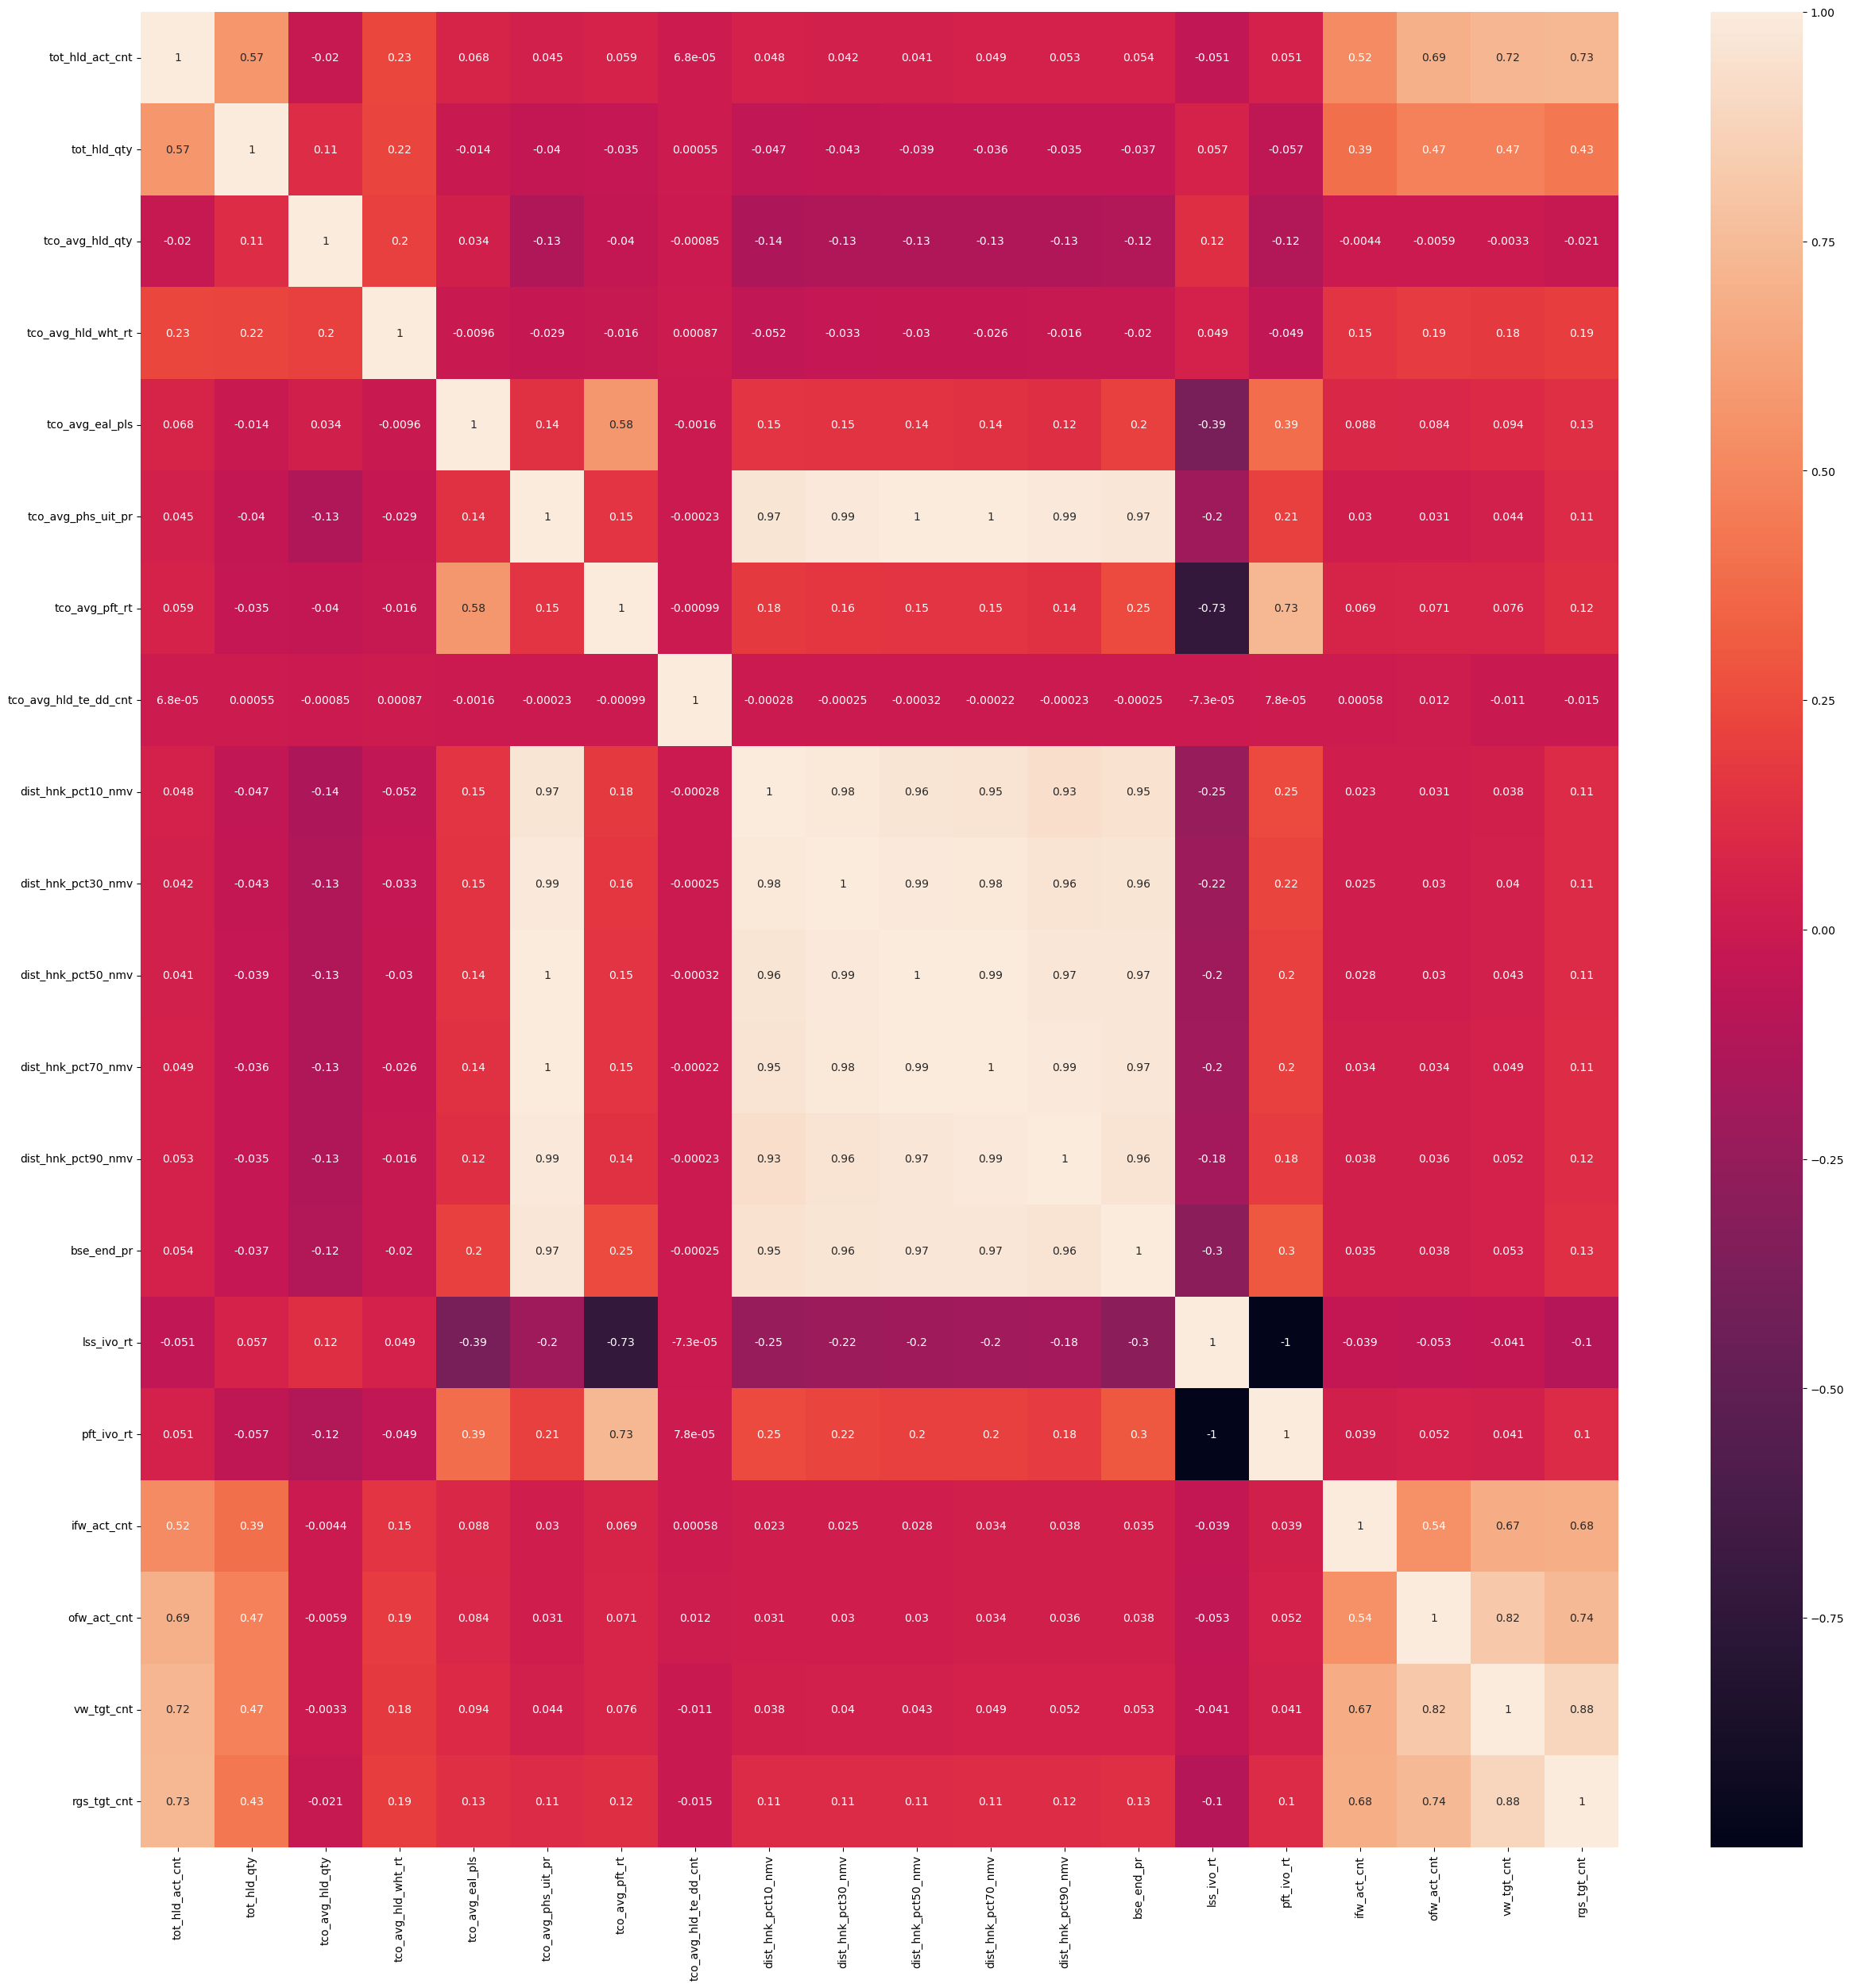

In [21]:
plt.figure(figsize=(30,30))
sns.heatmap(stk_dd_info_sort.corr(numeric_only = True),annot=True)

In [22]:
# 손익 투자자 비율과 다른 변수들의 상관계수 확인
stk_dd_info_sort.corr(numeric_only = True)[['lss_ivo_rt','pft_ivo_rt']]

lss_ivo_rt  pft_ivo_rt
tot_hld_act_cnt         -0.051411    0.051357
tot_hld_qty              0.057037   -0.057365
tco_avg_hld_qty          0.123970   -0.124701
tco_avg_hld_wht_rt       0.048688   -0.049183
tco_avg_eal_pls         -0.390395    0.390368
tco_avg_phs_uit_pr      -0.204932    0.205046
tco_avg_pft_rt          -0.730385    0.730384
tco_avg_hld_te_dd_cnt   -0.000073    0.000078
dist_hnk_pct10_nmv      -0.247872    0.247989
dist_hnk_pct30_nmv      -0.221449    0.221558
dist_hnk_pct50_nmv      -0.204249    0.204358
dist_hnk_pct70_nmv      -0.197340    0.197453
dist_hnk_pct90_nmv      -0.183180    0.183296
bse_end_pr              -0.296876    0.296953
lss_ivo_rt               1.000000   -0.999979
pft_ivo_rt              -0.999979    1.000000
ifw_act_cnt             -0.039103    0.038967
ofw_act_cnt             -0.052728    0.051708
vw_tgt_cnt              -0.040943    0.040782
rgs_tgt_cnt             -0.104744    0.104581

<Axes: >

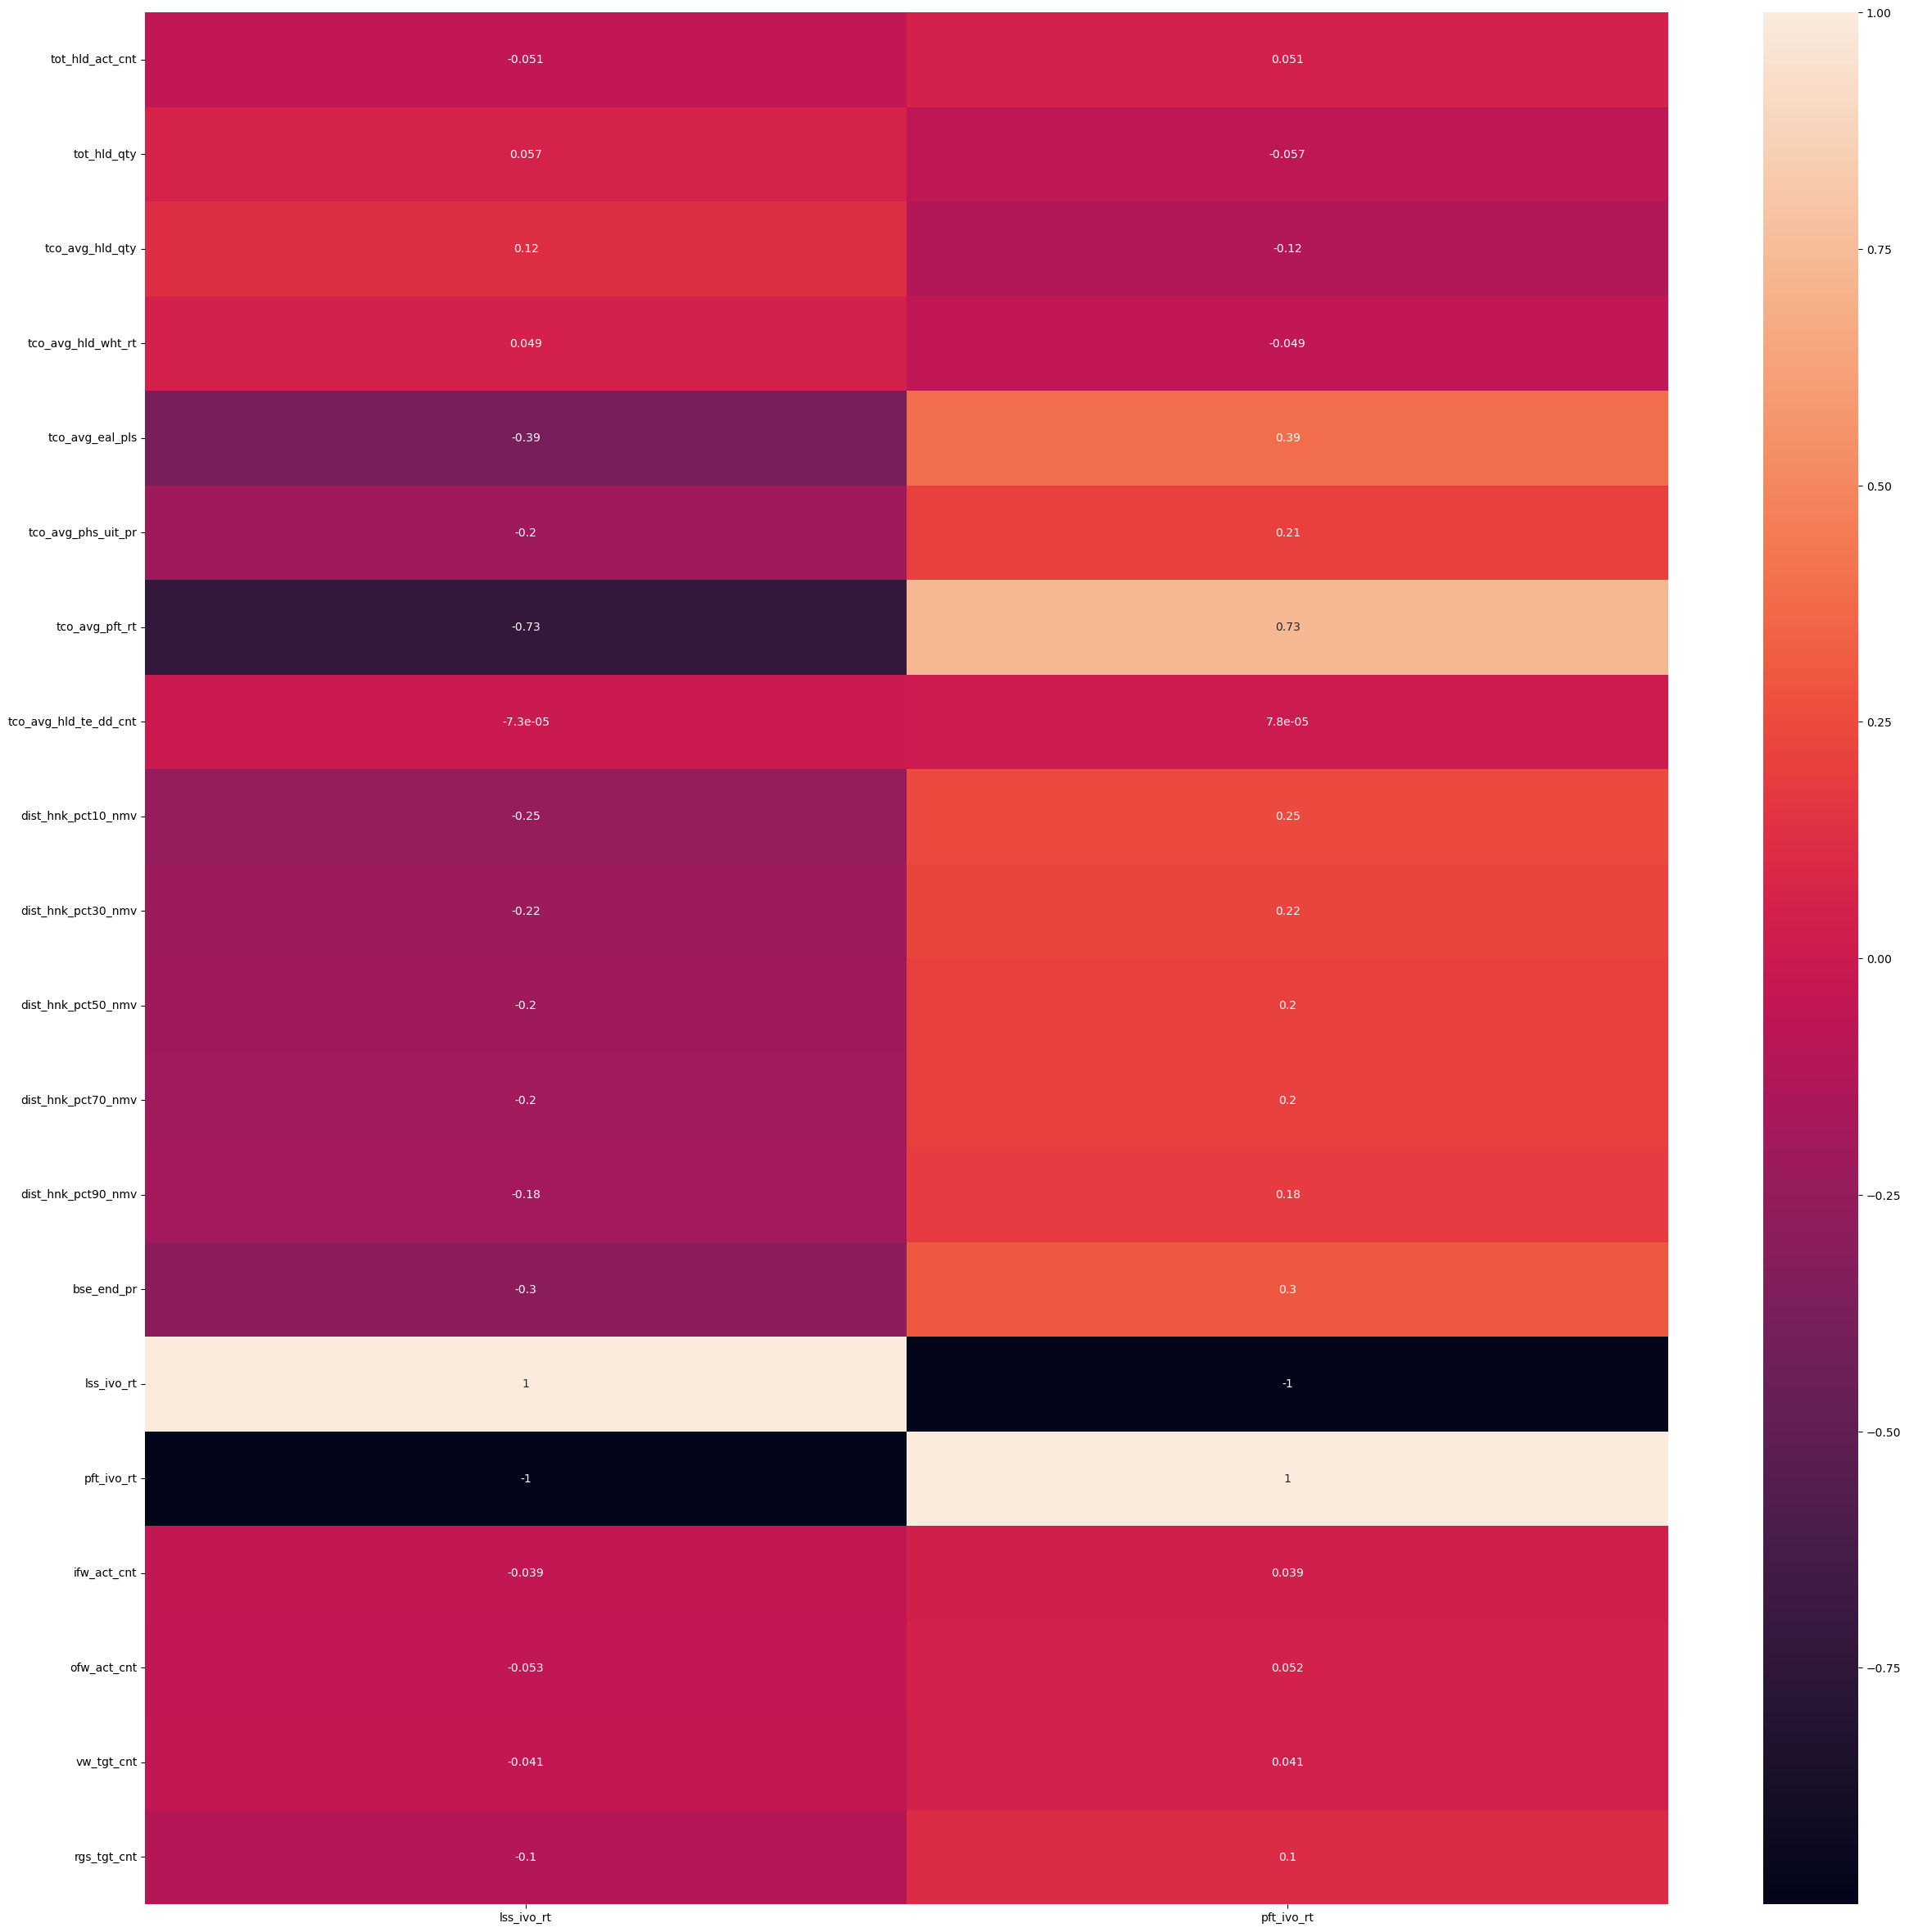

In [23]:
plt.figure(figsize=(30,30))
sns.heatmap(stk_dd_info_sort.corr(numeric_only = True)[['lss_ivo_rt','pft_ivo_rt']],annot=True)

손실투자자비율(lss_ivo_rt)와 상관계수가 높은 열
- tco_avg_eal_pls : 당사평균평가손익
- tco_avg_pft_rt : 당사평균수익률
- bse_end_pr : 기준종가

**NHTI(투자 유형 MBTI)의 분류 기준 중 Crowd Psychology (군중심리)에 활용 될 데이터**<br>
주식의 주요 지표인 종가 변화에 따른 경향성을 가지는 데이터와 상관계수가 높은 데이터 활용
- 손실투자자비율(lss_ivo_rt)
- tco_avg_eal_pls : 당사평균평가손익
- tco_avg_pft_rt : 당사평균수익률
- bse_end_pr : 기준종가

### 데이터 셋 교차분석
- NH_CONTEST_STK_DT_QUT 데이터 셋
- NH_CONTEST_NHDATA_STK_DD_IFO 데이터 셋
- NH_CONTEST_NHDATA_IFW_OFW_IFO 데이터 셋
- NH_CONTEST_NHDATA_CUS_TP_IFO 데이터 셋

**티커 코드와 일자를 기준으로 4가지 데이터 셋을 병합한 후 모든 컬럼의 상관계수 출력 및 확인(히트맵 이용, 0.7이상 상관계수만 뽑아내기)**

In [24]:
# 결합하기 위한 열의 타입을 맞춰줌
ifw_ofw_ifo['bse_dt'] = pd.to_datetime(ifw_ofw_ifo['bse_dt'].astype(str), format='%Y%m%d')
cus_tp_ifo['bse_dt'] = pd.to_datetime(cus_tp_ifo['bse_dt'].astype(str), format='%Y%m%d')

In [25]:
# 리스트에 데이터프레임 추가
dfs = [product_price, stk_dd_info, ifw_ofw_ifo, cus_tp_ifo]

# reduce를 사용해 병합
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['tck_iem_cd','bse_dt']), dfs)

In [26]:
df_merged.head()

bse_dt    tck_iem_cd  iem_ong_pr  iem_hi_pr  iem_low_pr  iem_end_pr  \
0 2024-06-03  AAL                 11.6     11.945        11.5       11.53   
1 2024-06-03  AAL                 11.6     11.945        11.5       11.53   
2 2024-06-03  AAL                 11.6     11.945        11.5       11.53   
3 2024-06-03  AAL                 11.6     11.945        11.5       11.53   
4 2024-06-03  AAL                 11.6     11.945        11.5       11.53   

   bf_dd_cmp_ind_pr  bf_dd_cmp_ind_rt  acl_trd_qty      trd_cst  \
0              0.03              0.26   52899042.0  609925954.0   
1              0.03              0.26   52899042.0  609925954.0   
2              0.03              0.26   52899042.0  609925954.0   
3              0.03              0.26   52899042.0  609925954.0   
4              0.03              0.26   52899042.0  609925954.0   

   sll_cns_sum_qty  byn_cns_sum_qty  sby_bse_xcg_rt  tot_hld_act_cnt  \
0       27221369.0       25722473.0          1381.6             2700   
1       27221369.0       25722473.0          1381.6             2700   
2       27221369.0       25722473.0          1381.6             2700   
3       27221369.0       25722473.0          1381.6             2700   
4       27221369.0       25722473.0          1381.6             2700   

   tot_hld_qty  tco_avg_hld_qty  tco_avg_hld_wht_rt  tco_avg_eal_pls  \
0       238423             88.3               14.49       -369035.51   
1       238423             88.3               14.49       -369035.51   
2       238423             88.3               14.49       -369035.51   
3       238423             88.3               14.49       -369035.51   
4       238423             88.3               14.49       -369035.51   

   tco_avg_phs_uit_pr  tco_avg_pft_rt  tco_avg_hld_te_dd_cnt  \
0            21188.17          -20.83                    3.0   
1            21188.17          -20.83                    3.0   
2            21188.17          -20.83                    3.0   
3            21188.17          -20.83                    3.0   
4            21188.17          -20.83                    3.0   

   dist_hnk_pct10_nmv  dist_hnk_pct30_nmv  dist_hnk_pct50_nmv  \
0         16320.46667            19170.78             21163.5   
1         16320.46667            19170.78             21163.5   
2         16320.46667            19170.78             21163.5   
3         16320.46667            19170.78             21163.5   
4         16320.46667            19170.78             21163.5   

   dist_hnk_pct70_nmv  dist_hnk_pct90_nmv  bse_end_pr  lss_ivo_rt  pft_ivo_rt  \
0           23437.078             25661.4   15888.363      0.9241      0.0759   
1           23437.078             25661.4   15888.363      0.9241      0.0759   
2           23437.078             25661.4   15888.363      0.9241      0.0759   
3           23437.078             25661.4   15888.363      0.9241      0.0759   
4           23437.078             25661.4   15888.363      0.9241      0.0759   

   ifw_act_cnt  ofw_act_cnt  vw_tgt_cnt  rgs_tgt_cnt  ifw_ofw_dit_cd  \
0           24           15         715            8               2   
1           24           15         715            8               2   
2           24           15         715            8               2   
3           24           15         715            8               2   
4           24           15         715            8               2   

  ifw_ofw_tck_cd  ifw_ofw_amt_wht_rt  ifw_ofw_rnk  cus_cgr_llf_cd  \
0   SLV                        56.27            1               2   
1   SLV                        56.27            1               2   
2   SLV                        56.27            1               2   
3   SLV                        56.27            1               2   
4   SLV                        56.27            1               2   

   cus_cgr_mlf_cd  cus_cgr_act_cnt_rt  cus_cgr_ivs_rt  
0              22             37.5185         33.7463  
1              23             23.8148         19.50

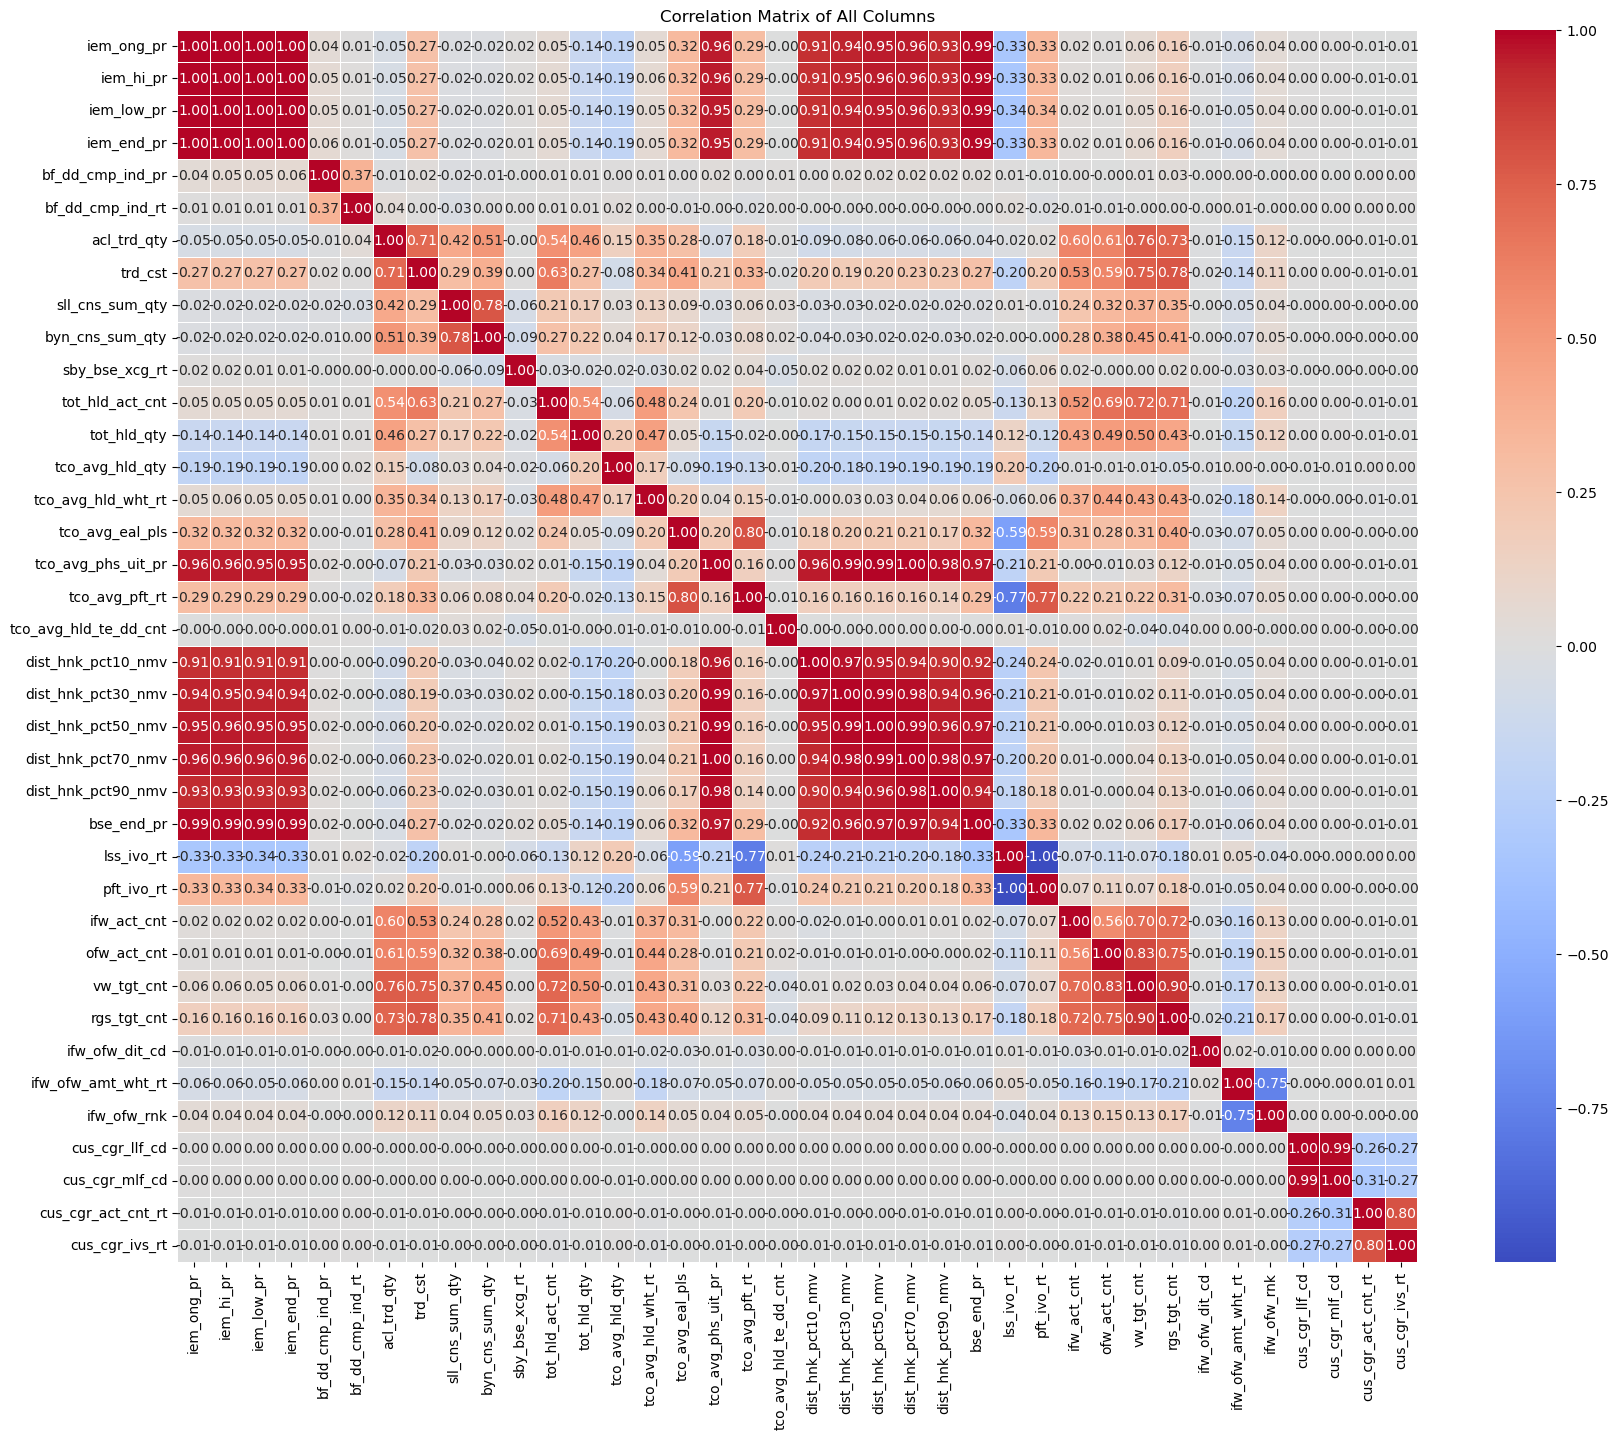

In [27]:
# 상관계수 계산: 숫자형 데이터만을 기준으로 상관관계 계산
all_correlation_matrix = df_merged.corr(numeric_only=True)

# 상관관계 히트맵 시각화
plt.figure(figsize=(20, 16))
sns.heatmap(all_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Columns')
plt.show()

In [28]:
all_correlation_matrix

iem_ong_pr  iem_hi_pr  iem_low_pr  iem_end_pr  \
iem_ong_pr               1.000000   0.999770    0.999753    0.999583   
iem_hi_pr                0.999770   1.000000    0.999589    0.999757   
iem_low_pr               0.999753   0.999589    1.000000    0.999797   
iem_end_pr               0.999583   0.999757    0.999797    1.000000   
bf_dd_cmp_ind_pr         0.039497   0.049681    0.050676    0.060766   
bf_dd_cmp_ind_rt         0.006337   0.009717    0.010939    0.014292   
acl_trd_qty             -0.052646  -0.051491   -0.053759   -0.052915   
trd_cst                  0.269015   0.269466    0.268880    0.269265   
sll_cns_sum_qty         -0.020454  -0.019277   -0.020537   -0.019500   
byn_cns_sum_qty         -0.018685  -0.017733   -0.018701   -0.017853   
sby_bse_xcg_rt           0.015224   0.015225    0.014554    0.014706   
tot_hld_act_cnt          0.048871   0.048578    0.049649    0.049244   
tot_hld_qty             -0.142493  -0.141776   -0.143239   -0.142586   
tco_avg_hld_qty         -0.188299  -0.187867   -0.188966   -0.188450   
tco_avg_hld_wht_rt       0.054296   0.056088    0.052495    0.054072   
tco_avg_eal_pls          0.318225   0.317883    0.318359    0.317846   
tco_avg_phs_uit_pr       0.955260   0.956016    0.954089    0.954843   
tco_avg_pft_rt           0.289918   0.288748    0.291185    0.289959   
tco_avg_hld_te_dd_cnt   -0.003785  -0.002665   -0.003033   -0.002250   
dist_hnk_pct10_nmv       0.911518   0.911734    0.911010    0.911223   
dist_hnk_pct30_nmv       0.944325   0.945174    0.942948    0.943767   
dist_hnk_pct50_nmv       0.954788   0.955505    0.953499    0.954214   
dist_hnk_pct70_nmv       0.958296   0.958983    0.957170    0.957896   
dist_hnk_pct90_nmv       0.929574   0.930528    0.928319    0.929297   
bse_end_pr               0.988780   0.988587    0.988510    0.988356   
lss_ivo_rt              -0.333130  -0.330548   -0.335876   -0.333137   
pft_ivo_rt               0.333443   0.330857    0.336194    0.333451   
ifw_act_cnt              0.017418   0.018335    0.016636    0.017273   
ofw_act_cnt              0.011973   0.013565    0.011247    0.012684   
vw_tgt_cnt               0.055792   0.057330    0.054607    0.056089   
rgs_tgt_cnt              0.163059   0.163911    0.162289    0.162893   
ifw_ofw_dit_cd          -0.012320  -0.012284   -0.012379   -0.012354   
ifw_ofw_amt_wht_rt      -0.055183  -0.055611   -0.054778   -0.055171   
ifw_ofw_rnk              0.042848   0.043207    0.042518    0.042866   
cus_cgr_llf_cd           0.003894   0.003884    0.003914    0.003905   
cus_cgr_mlf_cd           0.004453   0.004443    0.004474    0.004464   
cus_cgr_act_cnt_rt      -0.005021  -0.005021   -0.005015   -0.005014   
cus_cgr_ivs_rt          -0.005257  -0.005256   -0.005250   -0.005249   

                       bf_dd_cmp_ind_pr  bf_dd_cmp_ind_rt  acl_trd_qty  \
iem_ong_pr                 3.949701e-02          0.006337    -0.052646   
iem_hi_pr                  4.968080e-02          0.009717    -0.051491   
iem_low_pr                 5.067596e-02          0.010939    -0.053759   
iem_end_pr                 6.076555e-02          0.014292    -0.052915   
bf_dd_cmp_ind_pr           1.000000e+00          0.366054    -0.009633   
bf_dd_cmp_ind_rt           3.660544e-01          1.000000     0.036178   
acl_trd_qty               -9.633387e-03          0.036178     1.000000   
trd_cst                    2.333719e-02          0.000225     0.713294   
sll_cns_sum_qty           -1.711151e-02         -0.032814     0.418626   
byn_cns_sum_qty           -1.116707e-02          0.000248     0.514113   
sby_bse_xcg_rt            -2.705489e-03          0.002102    -0.004038   
tot_hld_act_cnt            1.143850e-02          0.011543     0.544432   
tot_hld_qty                5.011981e-03          0.010971     0.456409   
tco_avg_hld_qty            2.240993e-03          0.017520     0.152461   
tco_avg_hld_wht_rt         8.284827e-03          0.002668     0.351030   
tco_avg_eal_pls            3.7

In [29]:
# 상관계수 절대값이 0.7 이상인 값들만 필터링
high_corr_pairs = (all_correlation_matrix
                   .where(np.triu(np.ones(all_correlation_matrix.shape), k=1).astype(bool))  # 대각선을 제외한 상삼각 행렬만 가져옴
                   .stack()  # 상관관계 쌍을 추출
                   .reset_index()  # DataFrame으로 변환
                   .rename(columns={0: 'correlation'})  # 상관관계 열 이름 설정
                   .query('0.90 >= abs(correlation) >= 0.70'))  # 상관계수 절대값이 0.70 이상인 것만 필터링

# 결과 확인
high_corr_pairs

level_0          level_1  correlation
207         acl_trd_qty          trd_cst     0.713294
229         acl_trd_qty       vw_tgt_cnt     0.760576
230         acl_trd_qty      rgs_tgt_cnt     0.730386
259             trd_cst       vw_tgt_cnt     0.750360
260             trd_cst      rgs_tgt_cnt     0.782657
268     sll_cns_sum_qty  byn_cns_sum_qty     0.784195
369     tot_hld_act_cnt       vw_tgt_cnt     0.721959
370     tot_hld_act_cnt      rgs_tgt_cnt     0.709754
451     tco_avg_eal_pls   tco_avg_pft_rt     0.803491
500      tco_avg_pft_rt       lss_ivo_rt    -0.768075
501      tco_avg_pft_rt       pft_ivo_rt     0.767966
650         ifw_act_cnt      rgs_tgt_cnt     0.718395
658         ofw_act_cnt       vw_tgt_cnt     0.830167
659         ofw_act_cnt      rgs_tgt_cnt     0.753063
667          vw_tgt_cnt      rgs_tgt_cnt     0.897902
688  ifw_ofw_amt_wht_rt      ifw_ofw_rnk    -0.745367
702  cus_cgr_act_cnt_rt   cus_cgr_ivs_rt     0.802933

- 금융권 종사자에게 자문을 구한 결과를 토대로 거래 대금의 경우 시장에서 특정 종목에 대한 관심도를 파악할 수 있는 중요 지표라고 생각, 또한 종목조회건수도 관심도를 직접적으로 나타내고 있다고 생각했다.
- VW_TGT_CNT(종목조회건수)나 TRD_CST(거래대금)과의 상관계수가 0.9 이하, 0.7이상인 컬럼을 추출
- 그 중 ACL_TRD_QTY(누적거래수량), SLL_CNS_SUM_QTY(매도체결합계수량), BYN_CNS_SUM_QTY(매수체결합계수량)의 경우 거래 대금과 직접적으로 큰 연관이 있기 때문에 모두 활용하기엔 거래대금이 분류 기준에 과한 영향을 끼칠 것 같아 제외

In [30]:
# p-value 계산을 위한 컬럼들 선택
columns_of_interest = ['vw_tgt_cnt', 'ifw_act_cnt', 'rgs_tgt_cnt', 'ofw_act_cnt', 'trd_cst']

# p-value 계산 후 결과 저장
correlation_results = []
for col1 in columns_of_interest:
    for col2 in columns_of_interest:
        if col1 != col2:
            corr, p_value = spst.pearsonr(df_merged[col1], df_merged[col2])
            correlation_results.append([col1, col2, corr, p_value])

# 결과를 DataFrame으로 변환
correlation_df = pd.DataFrame(correlation_results, columns=['변수1', '변수2', '상관계수', 'p-value'])
correlation_df

변수1          변수2      상관계수  p-value
0    vw_tgt_cnt  ifw_act_cnt  0.699728      0.0
1    vw_tgt_cnt  rgs_tgt_cnt  0.897902      0.0
2    vw_tgt_cnt  ofw_act_cnt  0.830167      0.0
3    vw_tgt_cnt      trd_cst  0.750360      0.0
4   ifw_act_cnt   vw_tgt_cnt  0.699728      0.0
5   ifw_act_cnt  rgs_tgt_cnt  0.718395      0.0
6   ifw_act_cnt  ofw_act_cnt  0.564476      0.0
7   ifw_act_cnt      trd_cst  0.529876      0.0
8   rgs_tgt_cnt   vw_tgt_cnt  0.897902      0.0
9   rgs_tgt_cnt  ifw_act_cnt  0.718395      0.0
10  rgs_tgt_cnt  ofw_act_cnt  0.753063      0.0
11  rgs_tgt_cnt      trd_cst  0.782657      0.0
12  ofw_act_cnt   vw_tgt_cnt  0.830167      0.0
13  ofw_act_cnt  ifw_act_cnt  0.564476      0.0
14  ofw_act_cnt  rgs_tgt_cnt  0.753063      0.0
15  ofw_act_cnt      trd_cst  0.589032      0.0
16      trd_cst   vw_tgt_cnt  0.750360      0.0
17      trd_cst  ifw_act_cnt  0.529876      0.0
18      trd_cst  rgs_tgt_cnt  0.782657      0.0
19      trd_cst  ofw_act_cnt  0.589032      0.0

총 5개의 변수 간의 각각의 상관계수 또한 모두 0.5이상, 0.9이하로 적절한 관계성을 확인할 수 있다.

**따라서 VW_TGT_CNT(종목조회건수), IFW_ACT_CNT(신규매수계좌수), RGS_TGT_CNT(관심종목등록건수),OFW_ACT_CNT(전량매도계좌수)
TRD_CST(거래대금)을 분류 기준중 하나인 Interest (관심도)의 조건으로 사용**

## 2. 데이터 전처리
기존 데이터들은 대략 3개월치 시계열 데이터이다.<br>
그런데 사용자의 투자유형을 분류할 당시의 데이터만을 사용해서는 시계열적인 특성을 반영하지 못한다고 생각했다.<br>
따라서 1일전, 5일전, 14일전, 1일후, 5일후, 14일후 여러 기간을 정하고 기간에 따른 변화량을 파생변수로 만들어서 사용한다.
### 데이터 전처리를 위한 병합

In [31]:
#NH_CONTEST_NW_FC_STK_IEM_IFO, NH_CONTEST_STK_DT_QUT, NH_CONTEST_NHDATA_STK_DD_IFO 3개 파일 병합
# CSV 파일 읽기 (인코딩 지정) 다른 병합 데이터와 구분하기 위해 이름 변경
df1 = pd.read_csv(os.path.join(data_path, 'NH_CONTEST_NW_FC_STK_IEM_IFO.csv'), encoding='cp949')
df2 = pd.read_csv(os.path.join(data_path, 'NH_CONTEST_STK_DT_QUT.csv'), encoding='cp949')
df3 = pd.read_csv(os.path.join(data_path, 'NH_CONTEST_NHDATA_STK_DD_IFO.csv'), encoding='cp949')

# 공백 제거 및 대문자 변환
df1['tck_iem_cd'] = df1['tck_iem_cd'].astype(str).str.strip().str.upper()
df2['tck_iem_cd'] = df2['tck_iem_cd'].astype(str).str.strip().str.upper()
df3['tck_iem_cd'] = df3['tck_iem_cd'].astype(str).str.strip().str.upper()

# bse_dt 공백 제거
df2['bse_dt'] = df2['bse_dt'].astype(str).str.strip()
df3['bse_dt'] = df3['bse_dt'].astype(str).str.strip()

# df1에서 tck_iem_cd와 ltg_tot_stk_qty 가져오기
ltg_tot_stk_qty_df = df1[['tck_iem_cd', 'ltg_tot_stk_qty']]

# df2와 df3에서 공통 bse_dt와 tck_iem_cd 찾기
common_keys_df2_df3 = pd.merge(df2[['bse_dt', 'tck_iem_cd']], df3[['bse_dt', 'tck_iem_cd']], on=['bse_dt', 'tck_iem_cd'])
filtered_df2 = df2[df2.set_index(['bse_dt', 'tck_iem_cd']).index.isin(common_keys_df2_df3.set_index(['bse_dt', 'tck_iem_cd']).index)]
filtered_df3 = df3[df3.set_index(['bse_dt', 'tck_iem_cd']).index.isin(common_keys_df2_df3.set_index(['bse_dt', 'tck_iem_cd']).index)]

# df2에 ltg_tot_stk_qty를 tck_iem_cd 기준으로 결합
filtered_df2 = filtered_df2.merge(ltg_tot_stk_qty_df, on='tck_iem_cd', how='left')

# 시가총액을 시계열 데이터로 만들기 위해 종목종가와 곱해서 mkt_pr_tot_amt 생성 (ltg_tot_stk_qty와 IEM_END_PR 곱하기)
filtered_df2['mkt_pr_tot_amt'] = filtered_df2['ltg_tot_stk_qty'] * filtered_df2['iem_end_pr']

# ltg_tot_stk_qty 컬럼 삭제
filtered_df2.drop(columns=['ltg_tot_stk_qty'], inplace=True)

# 최종 병합: df2와 df3
merged_df = pd.merge(filtered_df2, filtered_df3, on=['bse_dt', 'tck_iem_cd'], suffixes=('_df2', '_df3'))

# 특정 조건에 맞는 값 업데이트
merged_df.loc[(merged_df['tck_iem_cd'] == 'ZVRA') & (merged_df['bse_dt'] == '20240802'),
               ['iem_ong_pr', 'iem_hi_pr', 'iem_low_pr', 'iem_end_pr']] = 6.3

# 결과를 새로운 CSV 파일로 저장
output_file = 'merge_output.csv'  # 결과 파일 이름
merged_df.to_csv(data_path+'/'+output_file, index=False)

print("파일이 성공적으로 저장되었습니다:", output_file)
print("df1 tck_iem_cd 유니크 값:", df1['tck_iem_cd'].unique())
print("filtered_df2 tck_iem_cd 유니크 값:", filtered_df2['tck_iem_cd'].unique())
print("filtered_df3 tck_iem_cd 유니크 값:", filtered_df3['tck_iem_cd'].unique())

파일이 성공적으로 저장되었습니다: merge_output.csv
df1 tck_iem_cd 유니크 값: ['AA' 'AAL' 'AAN' ... 'ZWS' 'ZYME' 'ZYXI']
filtered_df2 tck_iem_cd 유니크 값: ['AAL' 'AAOI' 'AAPB' ... 'ZIM' 'ZM' 'ZS']
filtered_df3 tck_iem_cd 유니크 값: ['AAL' 'AAOI' 'AAPB' ... 'ZIM' 'ZM' 'ZS']


### Crowd Psychology (군중심리),  Interest (관심도) 관련 파생변수 생성 및 Volatility (변동성) 관련 NATR 생성
- 시계열적인 특성을 반영하기 위한 파생변수 생성
- Volatility (변동성) 분류 기준에 사용하기 위한 파생변수로 주가의 변동성을 측정하는데 사용되는 기술적 지표 NATR(N Average True Range)변수를 생성
그냥 ATR이라고 하는듯

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
# 병합한 CSV 파일 불러오기
df = pd.read_csv(os.path.join(data_path, 'merge_output.csv'), encoding='cp949')

# 데이터 정렬
df.sort_values(by=['tck_iem_cd', 'bse_dt'], inplace=True)

# TR 계산
def calculate_tr(group):
    group['Previous Close'] = group['iem_end_pr'].shift(1)
    group['TR'] = group[['iem_hi_pr', 'iem_low_pr', 'Previous Close']].apply(
        lambda x: max(x['iem_hi_pr'] - x['iem_low_pr'],
                      abs(x['iem_hi_pr'] - x['Previous Close']),
                      abs(x['iem_low_pr'] - x['Previous Close'])), axis=1)
    return group

# NATR 계산 (여러 기간)
def calculate_natr_multiple(group, periods=[7, 14, 30]):
    group = calculate_tr(group)  # TR 계산
    for period in periods:
        group[f'NATR_{period}'] = (group['TR'].rolling(window=period).mean() / group['iem_end_pr'])
    return group


# 반올림 함수
def round_values(group, columns):
    for column in columns:
        group[column] = group[column].round(4)  # 셋째 자리에서 반올림
    return group

# 그룹화 및 변화량 계산
def calculate_trends(group):
    # 인덱스를 bse_dt로 설정
    group.set_index('bse_dt', inplace=True)

    # 변화량 계산 (비거래일 고려)
    group['slope_tco_avg_eal_pls_1d'] = (group['tco_avg_eal_pls'].shift(1) - group['tco_avg_eal_pls']) / 1
    group['slope_tco_avg_eal_pls_5d'] = (group['tco_avg_eal_pls'].shift(5) - group['tco_avg_eal_pls']) / 5
    group['slope_tco_avg_eal_pls_14d'] = (group['tco_avg_eal_pls'].shift(14) - group['tco_avg_eal_pls']) / 14
    group['slope_tco_avg_pft_rt_1d'] = (group['tco_avg_pft_rt'].shift(1) - group['tco_avg_pft_rt']) / 1
    group['slope_tco_avg_pft_rt_5d'] = (group['tco_avg_pft_rt'].shift(5) - group['tco_avg_pft_rt']) / 5
    group['slope_tco_avg_pft_rt_14d'] = (group['tco_avg_pft_rt'].shift(14) - group['tco_avg_pft_rt']) / 14
    group['slope_lss_ivo_rt_1d'] = (group['lss_ivo_rt'].shift(1) - group['lss_ivo_rt']) / 1
    group['slope_lss_ivo_rt_5d'] = (group['lss_ivo_rt'].shift(5) - group['lss_ivo_rt']) / 5
    group['slope_lss_ivo_rt_14d'] = (group['lss_ivo_rt'].shift(14) - group['lss_ivo_rt']) / 14
    group['slope_ifw_act_cnt_1d'] = (group['ifw_act_cnt'].shift(1) - group['ifw_act_cnt']) / 1
    group['slope_ifw_act_cnt_5d'] = (group['ifw_act_cnt'].shift(5) - group['ifw_act_cnt']) / 5
    group['slope_ifw_act_cnt_14d'] = (group['ifw_act_cnt'].shift(14) - group['ifw_act_cnt']) / 14
    group['slope_ofw_act_cnt_1d'] = (group['ofw_act_cnt'].shift(1) - group['ofw_act_cnt']) / 1
    group['slope_ofw_act_cnt_5d'] = (group['ofw_act_cnt'].shift(5) - group['ofw_act_cnt']) / 5
    group['slope_ofw_act_cnt_14d'] = (group['ofw_act_cnt'].shift(14) - group['ofw_act_cnt']) / 14
    group['slope_vw_tgt_cnt_1d'] = (group['vw_tgt_cnt'].shift(1) - group['vw_tgt_cnt']) / 1
    group['slope_vw_tgt_cnt_5d'] = (group['vw_tgt_cnt'].shift(5) - group['vw_tgt_cnt']) / 5
    group['slope_vw_tgt_cnt_14d'] = (group['vw_tgt_cnt'].shift(14) - group['vw_tgt_cnt']) / 14
    group['slope_rgs_tgt_cnt_1d'] = (group['rgs_tgt_cnt'].shift(1) - group['rgs_tgt_cnt']) / 1
    group['slope_rgs_tgt_cnt_5d'] = (group['rgs_tgt_cnt'].shift(5) - group['rgs_tgt_cnt']) / 5
    group['slope_rgs_tgt_cnt_14d'] = (group['rgs_tgt_cnt'].shift(14) - group['rgs_tgt_cnt']) / 14
    group['slope_trd_cst_1d'] = (group['trd_cst'].shift(1) - group['trd_cst']) / 1
    group['slope_trd_cst_5d'] = (group['trd_cst'].shift(5) - group['trd_cst']) / 5
    group['slope_trd_cst_14d'] = (group['trd_cst'].shift(14) - group['trd_cst']) / 14
    
    # 미래 변화량 계산(데이터 내에서 각 시점을 기준으로 시점 이후 데이터 사용)
    group['future_slope_tco_avg_eal_pls_1d'] = (group['tco_avg_eal_pls'].shift(-1) - group['tco_avg_eal_pls']) / 1
    group['future_slope_tco_avg_eal_pls_5d'] = (group['tco_avg_eal_pls'].shift(-5) - group['tco_avg_eal_pls']) / 5
    group['future_slope_tco_avg_eal_pls_14d'] = (group['tco_avg_eal_pls'].shift(-14) - group['tco_avg_eal_pls']) / 14
    group['future_slope_tco_avg_pft_rt_1d'] = (group['tco_avg_pft_rt'].shift(-1) - group['tco_avg_pft_rt']) / 1
    group['future_slope_tco_avg_pft_rt_5d'] = (group['tco_avg_pft_rt'].shift(-5) - group['tco_avg_pft_rt']) / 5
    group['future_slope_tco_avg_pft_rt_14d'] = (group['tco_avg_pft_rt'].shift(-14) - group['tco_avg_pft_rt']) / 14
    group['future_slope_lss_ivo_rt_1d'] = (group['lss_ivo_rt'].shift(-1) - group['lss_ivo_rt']) / 1
    group['future_slope_lss_ivo_rt_5d'] = (group['lss_ivo_rt'].shift(-5) - group['lss_ivo_rt']) / 5
    group['future_slope_lss_ivo_rt_14d'] = (group['lss_ivo_rt'].shift(-14) - group['lss_ivo_rt']) / 14
    group['future_slope_ifw_act_cnt_1d'] = (group['ifw_act_cnt'].shift(-1) - group['ifw_act_cnt']) / 1
    group['future_slope_ifw_act_cnt_5d'] = (group['ifw_act_cnt'].shift(-5) - group['ifw_act_cnt']) / 5
    group['future_slope_ifw_act_cnt_14d'] = (group['ifw_act_cnt'].shift(-14) - group['ifw_act_cnt']) / 14
    group['future_slope_ofw_act_cnt_1d'] = (group['ofw_act_cnt'].shift(-1) - group['ofw_act_cnt']) / 1
    group['future_slope_ofw_act_cnt_5d'] = (group['ofw_act_cnt'].shift(-5) - group['ofw_act_cnt']) / 5
    group['future_slope_ofw_act_cnt_14d'] = (group['ofw_act_cnt'].shift(-14) - group['ofw_act_cnt']) / 14
    group['future_slope_vw_tgt_cnt_1d'] = (group['vw_tgt_cnt'].shift(-1) - group['vw_tgt_cnt']) / 1
    group['future_slope_vw_tgt_cnt_5d'] = (group['vw_tgt_cnt'].shift(-5) - group['vw_tgt_cnt']) / 5
    group['future_slope_vw_tgt_cnt_14d'] = (group['vw_tgt_cnt'].shift(-14) - group['vw_tgt_cnt']) / 14
    group['future_slope_rgs_tgt_cnt_1d'] = (group['rgs_tgt_cnt'].shift(-1) - group['rgs_tgt_cnt']) / 1
    group['future_slope_rgs_tgt_cnt_5d'] = (group['rgs_tgt_cnt'].shift(-5) - group['rgs_tgt_cnt']) / 5
    group['future_slope_rgs_tgt_cnt_14d'] = (group['rgs_tgt_cnt'].shift(-14) - group['rgs_tgt_cnt']) / 14
    group['future_slope_trd_cst_1d'] = (group['trd_cst'].shift(-1) - group['trd_cst']) / 1
    group['future_slope_trd_cst_5d'] = (group['trd_cst'].shift(-5) - group['trd_cst']) / 5
    group['future_slope_trd_cst_14d'] = (group['trd_cst'].shift(-14) - group['trd_cst']) / 14
    
    # NATR 계산 추가 (7일, 14일, 30일)
    group = calculate_natr_multiple(group)  # NATR 계산

    return group.reset_index()  # 인덱스 초기화 및 bse_dt 컬럼 유지

# 그룹화 적용
result = df.groupby('tck_iem_cd').apply(calculate_trends).reset_index(drop=True)

# 필요한 컬럼만 선택
final_result = result[['tck_iem_cd', 'bse_dt', 'mkt_pr_tot_amt', 'trd_cst',
    'slope_tco_avg_eal_pls_1d', 'slope_tco_avg_eal_pls_5d', 'slope_tco_avg_eal_pls_14d',
    'future_slope_tco_avg_eal_pls_1d', 'future_slope_tco_avg_eal_pls_5d', 'future_slope_tco_avg_eal_pls_14d',
    'slope_tco_avg_pft_rt_1d', 'slope_tco_avg_pft_rt_5d', 'slope_tco_avg_pft_rt_14d',
    'future_slope_tco_avg_pft_rt_1d', 'future_slope_tco_avg_pft_rt_5d', 'future_slope_tco_avg_pft_rt_14d',
    'slope_lss_ivo_rt_1d', 'slope_lss_ivo_rt_5d', 'slope_lss_ivo_rt_14d',
    'future_slope_lss_ivo_rt_1d', 'future_slope_lss_ivo_rt_5d', 'future_slope_lss_ivo_rt_14d',
    'slope_ifw_act_cnt_1d', 'slope_ifw_act_cnt_5d', 'slope_ifw_act_cnt_14d',
    'future_slope_ifw_act_cnt_1d', 'future_slope_ifw_act_cnt_5d', 'future_slope_ifw_act_cnt_14d',
    'slope_ofw_act_cnt_1d', 'slope_ofw_act_cnt_5d', 'slope_ofw_act_cnt_14d',
    'future_slope_ofw_act_cnt_1d', 'future_slope_ofw_act_cnt_5d', 'future_slope_ofw_act_cnt_14d',
    'slope_vw_tgt_cnt_1d', 'slope_vw_tgt_cnt_5d', 'slope_vw_tgt_cnt_14d',
    'future_slope_vw_tgt_cnt_1d', 'future_slope_vw_tgt_cnt_5d', 'future_slope_vw_tgt_cnt_14d',
    'slope_rgs_tgt_cnt_1d', 'slope_rgs_tgt_cnt_5d', 'slope_rgs_tgt_cnt_14d',
    'future_slope_rgs_tgt_cnt_1d', 'future_slope_rgs_tgt_cnt_5d', 'future_slope_rgs_tgt_cnt_14d',
    'slope_trd_cst_1d', 'slope_trd_cst_5d', 'slope_trd_cst_14d',
    'future_slope_trd_cst_1d', 'future_slope_trd_cst_5d', 'future_slope_trd_cst_14d', 'NATR_7', 'NATR_14', 'NATR_30'
]]

# 정규화 함수
def min_max_normalize(df, columns):
    normalized_df = df.copy()
    for column in columns:
        # NaN 값 제외
        filtered_column = normalized_df[column][normalized_df[column].notna()]

        if not filtered_column.empty:
            min_val = filtered_column.min()
            max_val = filtered_column.max()
            normalized_df[column] = normalized_df[column].apply(
                lambda x: (x - min_val) / (max_val - min_val) if max_val != min_val and pd.notna(x) else x
            )

    return normalized_df

# 정규화할 열 리스트
columns_to_normalize = ['mkt_pr_tot_amt', 'trd_cst',
    'slope_tco_avg_eal_pls_1d', 'slope_tco_avg_eal_pls_5d', 'slope_tco_avg_eal_pls_14d',
    'future_slope_tco_avg_eal_pls_1d', 'future_slope_tco_avg_eal_pls_5d', 'future_slope_tco_avg_eal_pls_14d',
    'slope_tco_avg_pft_rt_1d', 'slope_tco_avg_pft_rt_5d', 'slope_tco_avg_pft_rt_14d',
    'future_slope_tco_avg_pft_rt_1d', 'future_slope_tco_avg_pft_rt_5d', 'future_slope_tco_avg_pft_rt_14d',
    'slope_lss_ivo_rt_1d', 'slope_lss_ivo_rt_5d', 'slope_lss_ivo_rt_14d',
    'future_slope_lss_ivo_rt_1d', 'future_slope_lss_ivo_rt_5d', 'future_slope_lss_ivo_rt_14d',
    'slope_ifw_act_cnt_1d', 'slope_ifw_act_cnt_5d', 'slope_ifw_act_cnt_14d',
    'future_slope_ifw_act_cnt_1d', 'future_slope_ifw_act_cnt_5d', 'future_slope_ifw_act_cnt_14d',
    'slope_ofw_act_cnt_1d', 'slope_ofw_act_cnt_5d', 'slope_ofw_act_cnt_14d',
    'future_slope_ofw_act_cnt_1d', 'future_slope_ofw_act_cnt_5d', 'future_slope_ofw_act_cnt_14d',
    'slope_vw_tgt_cnt_1d', 'slope_vw_tgt_cnt_5d', 'slope_vw_tgt_cnt_14d',
    'future_slope_vw_tgt_cnt_1d', 'future_slope_vw_tgt_cnt_5d', 'future_slope_vw_tgt_cnt_14d',
    'slope_rgs_tgt_cnt_1d', 'slope_rgs_tgt_cnt_5d', 'slope_rgs_tgt_cnt_14d',
    'future_slope_rgs_tgt_cnt_1d', 'future_slope_rgs_tgt_cnt_5d', 'future_slope_rgs_tgt_cnt_14d',
    'slope_trd_cst_1d', 'slope_trd_cst_5d', 'slope_trd_cst_14d',
    'future_slope_trd_cst_1d', 'future_slope_trd_cst_5d', 'future_slope_trd_cst_14d', 'NATR_7', 'NATR_14', 'NATR_30'
]

# 정규화 수행
# 분류에 사용되는 데이터들의 스케일이 편차가 크기 때문에 편향성을 가질 위험이 있어 스케일을 동일하게 하고자 정규화 수행
final_result_normalized = min_max_normalize(final_result, columns_to_normalize)

# CSV 파일로 저장
output_file = 'slopes_about_normalized.csv'  # 정규화된 결과 파일 이름
final_result_normalized.to_csv(data_path+'/'+output_file, index=False)

print("정규화된 CSV 파일로 저장되었습니다.")




정규화된 CSV 파일로 저장되었습니다.


### ETF파일 전처리-BIG_CONTEST_DATA_ETF_HOLDINGS
- 위의 분류 기준으로 분석한 사용자의 NHTI를 활용하여 ETF를 추천하고 큐레이션 서비스를 제공하기 위한 전처리<br>
- 하지만 여건상 분류 기준에 사용한 데이터는 주식 데이터만을 사용했기 때문에 ETF중에서 주식종목이 반드시 포함된 ETF만을 사용

In [33]:
# sec_tp 컬럼의 값이 'ST'인 행만 남기기
filtered_etf = etf_holdings[etf_holdings['sec_tp'] == 'ST']

# 결합 결과 확인
print(filtered_etf.head())

# 결과를 새로운 CSV 파일로 저장
output_file = 'only_st_etf.csv'  # 결과 파일 이름
filtered_etf.to_csv(data_path+'/'+output_file, index=False)

print("필터링된 파일이 성공적으로 저장되었습니다:", output_file)

  etf_tck_cd tck_iem_cd   mkt_vlu            fc_sec_eng_nm fc_sec_krl_nm  \
0       AAPB       AAPL  36858666                     AAPL            애플   
3       AMDL        AMD   6530355                      AMD          에이엠디   
4       CLOU       TWLO  15400502           TWILIO INC - A          트윌리오   
5       CLOU       AKAM  15954631  AKAMAI TECHNOLOGIES INC          아카마이   
6       CLOU        BOX  16465312        BOX INC - CLASS A            박스   

   stk_qty  wht_pct sec_tp  
0   215737   66.778     ST  
3    36558   66.718     ST  
4   254933    4.266     ST  
5   157173    4.419     ST  
6   598521    4.561     ST  
필터링된 파일이 성공적으로 저장되었습니다: only_st_etf.csv


- NHTI에 따른 ETF추천 및 큐레이션을 위해 ETF 데이터 또한 주식 데이터와 동일하게 파생변수 생성
- 주식종목으로만 구성된 ETF이기 때문에 각 주식의 데이터를 토대로 WHT_PCT(보유 종목의 비중)을 가중치로 사용하여 데이터 생성

In [34]:
etf_df = pd.read_csv(os.path.join(data_path, 'only_st_etf.csv'))

In [35]:
etf_df.head()

etf_tck_cd tck_iem_cd   mkt_vlu            fc_sec_eng_nm fc_sec_krl_nm  \
0       AAPB       AAPL  36858666                     AAPL            애플   
1       AMDL        AMD   6530355                      AMD          에이엠디   
2       CLOU       TWLO  15400502           TWILIO INC - A          트윌리오   
3       CLOU       AKAM  15954631  AKAMAI TECHNOLOGIES INC          아카마이   
4       CLOU        BOX  16465312        BOX INC - CLASS A            박스   

   stk_qty  wht_pct sec_tp  
0   215737   66.778     ST  
1    36558   66.718     ST  
2   254933    4.266     ST  
3   157173    4.419     ST  
4   598521    4.561     ST

In [36]:
final_stock = pd.read_csv(os.path.join(data_path, 'slopes_about_normalized.csv'))

In [37]:
final_stock.head()

tck_iem_cd    bse_dt  mkt_pr_tot_amt   trd_cst  slope_tco_avg_eal_pls_1d  \
0         AA  20240528        0.000371  0.004107                       NaN   
1         AA  20240529        0.000377  0.002793                  0.498236   
2         AA  20240530        0.000382  0.003127                  0.498397   
3         AA  20240531        0.000380  0.002416                  0.498423   
4         AA  20240603        0.000377  0.002062                  0.498849   

   slope_tco_avg_eal_pls_5d  slope_tco_avg_eal_pls_14d  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

   future_slope_tco_avg_eal_pls_1d  future_slope_tco_avg_eal_pls_5d  \
0                         0.501764                         0.547192   
1                         0.501603                         0.545789   
2                         0.501577                         0.545664   
3                         0.501151                         0.544415   
4                         0.500919                         0.544758   

   future_slope_tco_avg_eal_pls_14d  slope_tco_avg_pft_rt_1d  \
0                          0.340730                      NaN   
1                          0.340131                 0.433926   
2                          0.340431                 0.436181   
3                          0.340749                 0.437026   
4                          0.340922                 0.447144   

   slope_tco_avg_pft_rt_5d  slope_tco_avg_pft_rt_14d  \
0                      NaN                       NaN   
1                      NaN                       NaN   
2                      NaN                       NaN   
3                      NaN                       NaN   
4                      NaN                       NaN   

   future_slope_tco_avg_pft_rt_1d  future_slope_tco_avg_pft_rt_5d  \
0                        0.566074                        0.371170   
1                        0.563819                        0.356045   
2                        0.562974                        0.354394   
3                        0.552856                        0.340547   
4                        0.550912                        0.346157   

   future_slope_tco_avg_pft_rt_14d  slope_lss_ivo_rt_1d  slope_lss_ivo_rt_5d  \
0                         0.447484                  NaN                  NaN   
1                         0.443695             0.534942                  NaN   
2                         0.446451             0.504590                  NaN   
3                         0.449264             0.506196                  NaN   
4                         0.452249             0.485727                  NaN   

   slope_lss_ivo_rt_14d  future_slope_lss_ivo_rt_1d  \
0                   NaN                    0.465058   
1                   NaN                    0.495410   
2                   NaN                    0.493804   
3                   NaN                    0.514273   
4                   NaN                    0.514724   

   future_slope_lss_ivo_rt_5d  future_slope_lss_ivo_rt_14d  \
0                    0.482992                      0.63815   
1                    0.576448                      0.66740   
2                    0.555245                      0.62905   
3                    0.624905                      0.57130   
4                    0.590431                      0.55670   

   slope_ifw_act_cnt_1d  slope_ifw_act_cnt_5d  slope_ifw_act_cnt_14d  \
0                   NaN                   NaN                    NaN   
1              0.486346                   NaN                    NaN   
2              0.486523                   NaN                    NaN   
3              0.486109                   NaN                    NaN   
4              0.486583                   NaN                    NaN   

  

In [38]:
final_stock.columns

Index(['tck_iem_cd', 'bse_dt', 'mkt_pr_tot_amt', 'trd_cst',
       'slope_tco_avg_eal_pls_1d', 'slope_tco_avg_eal_pls_5d',
       'slope_tco_avg_eal_pls_14d', 'future_slope_tco_avg_eal_pls_1d',
       'future_slope_tco_avg_eal_pls_5d', 'future_slope_tco_avg_eal_pls_14d',
       'slope_tco_avg_pft_rt_1d', 'slope_tco_avg_pft_rt_5d',
       'slope_tco_avg_pft_rt_14d', 'future_slope_tco_avg_pft_rt_1d',
       'future_slope_tco_avg_pft_rt_5d', 'future_slope_tco_avg_pft_rt_14d',
       'slope_lss_ivo_rt_1d', 'slope_lss_ivo_rt_5d', 'slope_lss_ivo_rt_14d',
       'future_slope_lss_ivo_rt_1d', 'future_slope_lss_ivo_rt_5d',
       'future_slope_lss_ivo_rt_14d', 'slope_ifw_act_cnt_1d',
       'slope_ifw_act_cnt_5d', 'slope_ifw_act_cnt_14d',
       'future_slope_ifw_act_cnt_1d', 'future_slope_ifw_act_cnt_5d',
       'future_slope_ifw_act_cnt_14d', 'slope_ofw_act_cnt_1d',
       'slope_ofw_act_cnt_5d', 'slope_ofw_act_cnt_14d',
       'future_slope_ofw_act_cnt_1d', 'future_slope_ofw_act_cnt_5d',
   

In [39]:
slope_cols=list(final_stock.columns)

In [40]:
slope_cols.remove('tck_iem_cd')

In [41]:
slope_cols.remove('bse_dt')

In [42]:
# 가중치 곱할 열
slope_cols

['mkt_pr_tot_amt',
 'trd_cst',
 'slope_tco_avg_eal_pls_1d',
 'slope_tco_avg_eal_pls_5d',
 'slope_tco_avg_eal_pls_14d',
 'future_slope_tco_avg_eal_pls_1d',
 'future_slope_tco_avg_eal_pls_5d',
 'future_slope_tco_avg_eal_pls_14d',
 'slope_tco_avg_pft_rt_1d',
 'slope_tco_avg_pft_rt_5d',
 'slope_tco_avg_pft_rt_14d',
 'future_slope_tco_avg_pft_rt_1d',
 'future_slope_tco_avg_pft_rt_5d',
 'future_slope_tco_avg_pft_rt_14d',
 'slope_lss_ivo_rt_1d',
 'slope_lss_ivo_rt_5d',
 'slope_lss_ivo_rt_14d',
 'future_slope_lss_ivo_rt_1d',
 'future_slope_lss_ivo_rt_5d',
 'future_slope_lss_ivo_rt_14d',
 'slope_ifw_act_cnt_1d',
 'slope_ifw_act_cnt_5d',
 'slope_ifw_act_cnt_14d',
 'future_slope_ifw_act_cnt_1d',
 'future_slope_ifw_act_cnt_5d',
 'future_slope_ifw_act_cnt_14d',
 'slope_ofw_act_cnt_1d',
 'slope_ofw_act_cnt_5d',
 'slope_ofw_act_cnt_14d',
 'future_slope_ofw_act_cnt_1d',
 'future_slope_ofw_act_cnt_5d',
 'future_slope_ofw_act_cnt_14d',
 'slope_vw_tgt_cnt_1d',
 'slope_vw_tgt_cnt_5d',
 'slope_vw_tgt_cnt_1

In [43]:
final_merge = pd.merge(etf_df, final_stock, on='tck_iem_cd')

In [44]:
final_merge.head()

etf_tck_cd tck_iem_cd   mkt_vlu fc_sec_eng_nm fc_sec_krl_nm  stk_qty  \
0       AAPB       AAPL  36858666          AAPL            애플   215737   
1       AAPB       AAPL  36858666          AAPL            애플   215737   
2       AAPB       AAPL  36858666          AAPL            애플   215737   
3       AAPB       AAPL  36858666          AAPL            애플   215737   
4       AAPB       AAPL  36858666          AAPL            애플   215737   

   wht_pct sec_tp    bse_dt  mkt_pr_tot_amt   trd_cst  \
0   66.778     ST  20240528        0.095903  0.119722   
1   66.778     ST  20240529        0.096055  0.121718   
2   66.778     ST  20240530        0.096560  0.115164   
3   66.778     ST  20240531        0.097044  0.174160   
4   66.778     ST  20240603        0.097943  0.117124   

   slope_tco_avg_eal_pls_1d  slope_tco_avg_eal_pls_5d  \
0                       NaN                       NaN   
1                  0.498937                       NaN   
2                  0.498555                       NaN   
3                  0.498207                       NaN   
4                  0.498387                       NaN   

   slope_tco_avg_eal_pls_14d  future_slope_tco_avg_eal_pls_1d  \
0                        NaN                         0.501063   
1                        NaN                         0.501445   
2                        NaN                         0.501793   
3                        NaN                         0.501613   
4                        NaN                         0.501503   

   future_slope_tco_avg_eal_pls_5d  future_slope_tco_avg_eal_pls_14d  \
0                         0.547605                          0.351060   
1                         0.547712                          0.350577   
2                         0.547501                          0.349098   
3                         0.547310                          0.347919   
4                         0.546450                          0.347609   

   slope_tco_avg_pft_rt_1d  slope_tco_avg_pft_rt_5d  slope_tco_avg_pft_rt_14d  \
0                      NaN                      NaN                       NaN   
1                 0.444945                      NaN                       NaN   
2                 0.441113                      NaN                       NaN   
3                 0.437364                      NaN                       NaN   
4                 0.439394                      NaN                       NaN   

   future_slope_tco_avg_pft_rt_1d  future_slope_tco_avg_pft_rt_5d  \
0                        0.555055                        0.371276   
1                        0.558887                        0.372040   
2                        0.562636                        0.370673   
3                        0.560606                        0.369057   
4                        0.559620                        0.364229   

   future_slope_tco_avg_pft_rt_14d  slope_lss_ivo_rt_1d  slope_lss_ivo_rt_5d  \
0                         0.492537                  NaN                  NaN   
1                         0.490786             0.497768                  NaN   
2                         0.485375             0.498871                  NaN   
3                         0.480753             0.498319                  NaN   
4                         0.479418             0.498319                  NaN   

   slope_lss_ivo_rt_14d  future_slope_lss_ivo_rt_1d  \
0                   NaN                    0.502232   
1                   NaN                    0.501129   
2                   NaN                    0.501681   
3                   NaN                    0.501681   
4                   NaN                    0.501681   

   future_slope_lss_ivo_rt_5d  future_slope_lss_ivo_rt_14d  \
0                    0.508466                      0.50000   
1                    0.507907                      0.49945   
2                    0.508466                      0.50545   
3                    0.508466                      0.50715   
4                    0.

In [45]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601671 entries, 0 to 601670
Data columns (total 62 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   etf_tck_cd                        601671 non-null  object 
 1   tck_iem_cd                        601671 non-null  object 
 2   mkt_vlu                           601671 non-null  int64  
 3   fc_sec_eng_nm                     601671 non-null  object 
 4   fc_sec_krl_nm                     601671 non-null  object 
 5   stk_qty                           601671 non-null  int64  
 6   wht_pct                           601671 non-null  float64
 7   sec_tp                            601671 non-null  object 
 8   bse_dt                            601671 non-null  int64  
 9   mkt_pr_tot_amt                    601671 non-null  float64
 10  trd_cst                           601671 non-null  float64
 11  slope_tco_avg_eal_pls_1d          591804 non-null  f

In [46]:
for col in slope_cols:
    final_merge[f'weighted{col}'] = final_merge[col]*final_merge['wht_pct']/100#보유 종목의 비중 (%)을 가중치로 곱해줌
    final_merge.drop(col, axis=1, inplace=True)#기존 열 제거

In [47]:
final_merge.head()

etf_tck_cd tck_iem_cd   mkt_vlu fc_sec_eng_nm fc_sec_krl_nm  stk_qty  \
0       AAPB       AAPL  36858666          AAPL            애플   215737   
1       AAPB       AAPL  36858666          AAPL            애플   215737   
2       AAPB       AAPL  36858666          AAPL            애플   215737   
3       AAPB       AAPL  36858666          AAPL            애플   215737   
4       AAPB       AAPL  36858666          AAPL            애플   215737   

   wht_pct sec_tp    bse_dt  weightedmkt_pr_tot_amt  weightedtrd_cst  \
0   66.778     ST  20240528                0.064042         0.079948   
1   66.778     ST  20240529                0.064144         0.081281   
2   66.778     ST  20240530                0.064481         0.076904   
3   66.778     ST  20240531                0.064804         0.116301   
4   66.778     ST  20240603                0.065404         0.078213   

   weightedslope_tco_avg_eal_pls_1d  weightedslope_tco_avg_eal_pls_5d  \
0                               NaN                               NaN   
1                          0.333180                               NaN   
2                          0.332925                               NaN   
3                          0.332693                               NaN   
4                          0.332813                               NaN   

   weightedslope_tco_avg_eal_pls_14d  weightedfuture_slope_tco_avg_eal_pls_1d  \
0                                NaN                                 0.334600   
1                                NaN                                 0.334855   
2                                NaN                                 0.335087   
3                                NaN                                 0.334967   
4                                NaN                                 0.334894   

   weightedfuture_slope_tco_avg_eal_pls_5d  \
0                                 0.365680   
1                                 0.365751   
2                                 0.365610   
3                                 0.365483   
4                                 0.364909   

   weightedfuture_slope_tco_avg_eal_pls_14d  weightedslope_tco_avg_pft_rt_1d  \
0                                  0.234431                              NaN   
1                                  0.234108                         0.297126   
2                                  0.233121                         0.294566   
3                                  0.232333                         0.292063   
4                                  0.232126                         0.293418   

   weightedslope_tco_avg_pft_rt_5d  weightedslope_tco_avg_pft_rt_14d  \
0                              NaN                               NaN   
1                              NaN                               NaN   
2                              NaN                               NaN   
3                              NaN                               NaN   
4                              NaN                               NaN   

   weightedfuture_slope_tco_avg_pft_rt_1d  \
0                                0.370654   
1                                0.373214   
2                                0.375717   
3                                0.374362   
4                                0.373703   

   weightedfuture_slope_tco_avg_pft_rt_5d  \
0                                0.247931   
1                                0.248441   
2                                0.247528   
3                                0.246449   
4                                0.243225   

   weightedfuture_slope_tco_avg_pft_rt_14d  weightedslope_lss_ivo_rt_1d  \
0                                 0.328906                          NaN   
1                                 0.327737                     0.332399   
2                                 0.324124                     0.333136   
3                                 0.321037                     0.332768   
4                                 0.320146                     0.332768   

   weightedslo

In [48]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601671 entries, 0 to 601670
Data columns (total 62 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   etf_tck_cd                                601671 non-null  object 
 1   tck_iem_cd                                601671 non-null  object 
 2   mkt_vlu                                   601671 non-null  int64  
 3   fc_sec_eng_nm                             601671 non-null  object 
 4   fc_sec_krl_nm                             601671 non-null  object 
 5   stk_qty                                   601671 non-null  int64  
 6   wht_pct                                   601671 non-null  float64
 7   sec_tp                                    601671 non-null  object 
 8   bse_dt                                    601671 non-null  int64  
 9   weightedmkt_pr_tot_amt                    601671 non-null  float64
 10  weightedtrd_cst     

In [49]:
final_merge.to_csv(data_path+'/'+'etf_final.csv', index=False)